# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data corresponds to five years of information (May 2008 to June 2013), all related to the same telephone-marketing campaign aimed at convincing existing bank customers to make long-term deposits. Since the objective of the campaign is a single one, I would say this is a single campaign. However, if the information is segmented into yearly efforts, then the dataset contains five different "campaigns". In fact, the following variables available in the set refer to the current campaign, and to the previous one:

* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
##For use with Google Colab only
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries/packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder,  MinMaxScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
import time




In [3]:
##If using Google colab:
#data = pd.read_csv('/content/drive/My Drive/Berkeley/data/mod17/bank-additional-full.csv', sep = ';')

data = pd.read_csv('bank-additional-full.csv', sep = ';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services',
 'student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target
(e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.
Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and
 should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric;
 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



##Data Understanding
###Basic examination of dataset

In [6]:
#Explore data types and number of values (any missing?)
print(data.shape)
data.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

From the data information we can already see that there are no missing values in any of the variables (41,188 rows and 21 columns).

We have a good mix of categorical and quantitative variables.

**Types of Features in Dataset**

| Categorical  |    | Quantitative      |
| ------------- | ------------- | ------|
| job *{admin/blue-collar/entrepreneur/... }*|| age *(integer)*|  
| marital *{divorced/married/single/unknown }*| | duration*(integer)*  [^*]|  
| education *{basic.4y/basic.6y/basic.9y/high.school/... }*| | campaign *(integer)*|
| default *{no/yes/unknown}*| | pdays *(integer)*|  
| housing *{no/yes/unknown}*| | previous *(integer)*|
| loan *{no/yes/unknown}*| | emp.var.rate *(float)*|  
| contact *{cellular/telephone}*| | cons.price.idx *(float)*|  
| month *{jan/feb/mar/.../ nov/dec}*| | cons.conf.idx *(float)*|  
| day_of_week *{mon/tue/wed/thu/fri}*|  | euribor3m *(float)*|  
| poutcome *{failure/nonexistent/success}*| | nr.employed *(integer)*|  
| ------------------------------------------------------------------------------------- | ------------- | ------------------------------|
| y *{yes/no}*|   | **Note:** This is the response variable

[^*] There is a special note about the 'duration' feature that will be discussed after analyzing the response feature.

###Response feature 'y'
The last column of the dataframe ('y') is the response feature that the classifiers will need to predict. It is a categorical (binary) feature with labels 'yes' for clients who did sign up for the long-term deposit --i.e., campaign success, and 'no' for clients who did not sign up for the long-term deposit (campaign failure).

####Checking for balance
In a classification problem it is important to assess whether the classes in the response feature are balanced.

In [7]:
#Breakdown of response feature 'y' in absolute and relative terms
print('Value Counts for response variable: ', data['y'].value_counts())
print()
print('In proportions: ', data['y'].value_counts(normalize = True))

Value Counts for response variable:  y
no     36548
yes     4640
Name: count, dtype: int64

In proportions:  y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


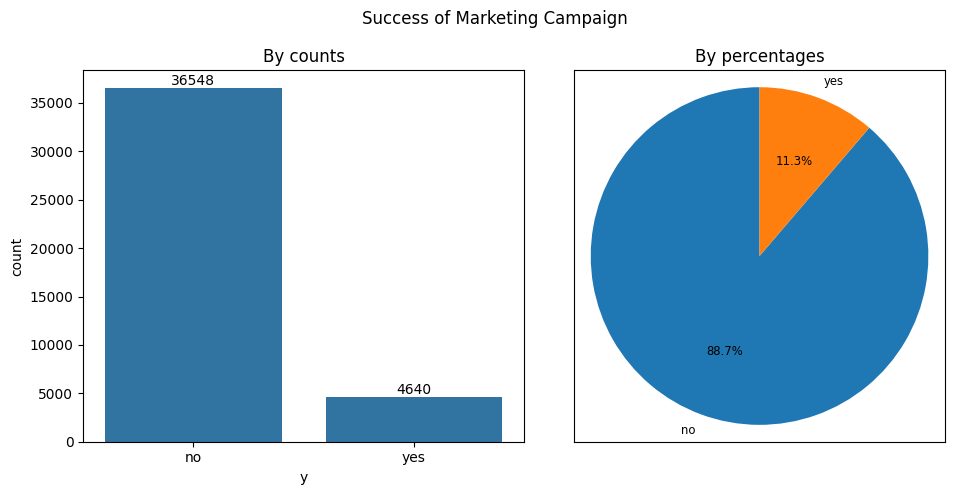

In [8]:
#Visual representation
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Success of Marketing Campaign')
#First plot: counts (bar chart)
sns.countplot(ax = axes[0], x=data['y'])
axes[0].set_title('By counts')
axes[0].bar_label(axes[0].containers[0])
#Second plot: percentages (pie chart)
axes[1].pie(x=data.y.value_counts(), labels=data.y.value_counts().index, autopct='%1.1f%%', frame = True, \
            textprops = {'size': 'smaller'}, startangle = 90)
axes[1].set_title('By percentages')
axes[1].set(xticklabels = [], xlabel = None, yticklabels = [], ylabel = None)
axes[1].tick_params(bottom = False, left = False)
plt.tight_layout()
plt.show()

The response variable is clearly unbalanced (which immediately implies that we shouldn't use accuracy as a metric for comparing the models, and instead we ought to focus on the elements in a confusion matrix such as precision and recall).


###Dropping the 'duration' feature

According to the documentation, this variable "should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model", so we will ignore it for this project.

In [4]:
#Create new dataframe 'bankdata' that has the duration feature removed
bankdata = data.copy()
bankdata = bankdata.drop('duration', axis = 1)

print(bankdata.shape)

(41188, 20)


As mentioned earlier, there are no missing values in any of the features, of which there are now only 19  after 'duration' was removed.

Now we explore the characteristics of the (remaining) explanatory features.

## **Exploratory Data Analysis Quantitative Features**



###NUMERICAL SUMMARIES

###All quantitative features in dataset

In [10]:
#Table summary - descriptive statistics
bankdata.describe().T #transpose the output for a better fit in the screen

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [11]:
#Breakdown by result of the marketing campaign ('y)
numerical_columns = bankdata.select_dtypes(include = np.number).columns.to_list()
for col in numerical_columns:
  print(col)
  print(bankdata.groupby('y')[col].describe())
  print('-----------------')


age
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0
yes   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0
-----------------
campaign
       count      mean       std  min  25%  50%  75%   max
y                                                         
no   36548.0  2.633085  2.873438  1.0  1.0  2.0  3.0  56.0
yes   4640.0  2.051724  1.666245  1.0  1.0  2.0  2.0  23.0
-----------------
pdays
       count        mean         std  min    25%    50%    75%    max
y                                                                    
no   36548.0  984.113878  120.656868  0.0  999.0  999.0  999.0  999.0
yes   4640.0  792.035560  403.407181  0.0  999.0  999.0  999.0  999.0
-----------------
previous
       count      mean       std  min  25%  50%  75%  max
y                                                        
no   36548.0  0.132374  0.

The collection of tables above allows us to notice an apparent difference between clients who do sign up for the long-term deposit instrument (y = 'yes') and those who do not (y = 'no') in the features 'previous' and 'emp.var.rate'. For the rest of the features, it is unclear whether there are significant differences between the groups. Nonetheless, our classifiers will make use of the information available, and through the process of refinement the algorithms will determine which features should be kept in the final model(s).

In [12]:
#Separate dataframes for yes and no - could be useful
bankdatayes = bankdata.loc[bankdata['y'] == 'yes']
bankdatano  = bankdata.loc[bankdata['y'] == 'no']
print(f'successful campaign:{bankdatayes.shape}')
print(f'unsuccessful campaign: {bankdatano.shape}')

successful campaign:(4640, 20)
unsuccessful campaign: (36548, 20)


###GRAPHICAL EXPLORATION

###'age'

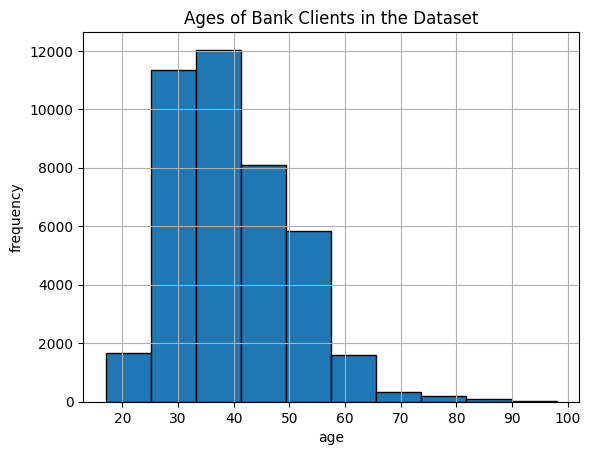

In [13]:
#Age
bankdata.age.hist(edgecolor = 'black')
plt.title('Ages of Bank Clients in the Dataset')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

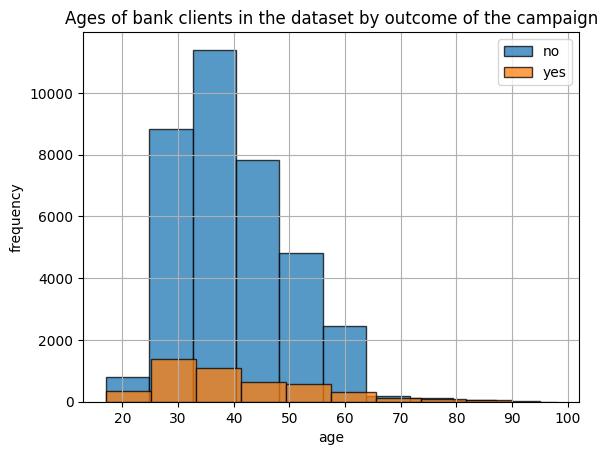

In [14]:
# Visualize ages by campaign outcome
bankdata.groupby('y')['age'].hist(alpha = 0.75, edgecolor = 'black', legend = True)
plt.title('Ages of bank clients in the dataset by outcome of the campaign')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

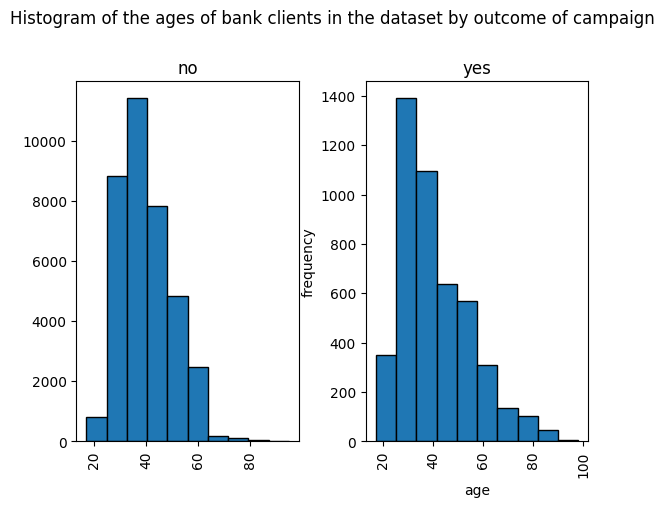

In [15]:
#Separate by campaign outcome
bankdata['age'].hist(by = bankdata['y'], edgecolor = 'black')
plt.suptitle('Histogram of the ages of bank clients in the dataset by outcome of campaign', y = 1.05)
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

It is interesting to see that while the overall shape of the distribution of ages is similar for both groups, there is a wider range of ages for clients who did sign up for the long-term deposit subject of the marketing campaign.



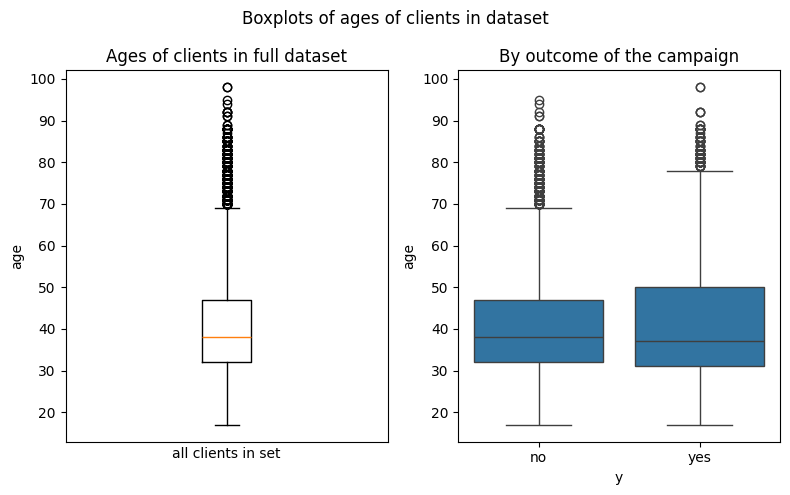


There is a total of [469] outliers in the set.


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Boxplots of ages of clients in dataset')
#First plot: boxplot of age for full set
boxplot = axes[0].boxplot(bankdata['age'])
axes[0].set_xlabel('all clients in set')
axes[0].set_xticks([])
axes[0].set_ylabel('age')
axes[0].set_title('Ages of clients in full dataset')
##Count outliers
outliers_count = [len(fliers.get_ydata()) for fliers in boxplot['fliers']]
#Second plot: by outcome of campaign
sns.boxplot(data = bankdata, x = 'y', y = 'age', ax = axes[1])
axes[1].set_title('By outcome of the campaign')
plt.tight_layout()
plt.show()

print()
print(f'There is a total of {outliers_count} outliers in the set.')

We had already detected that the distribution of ages of clients in the set is skewed right. These boxplots suggest that there may be outliers in this feature, which is an important issue to address.

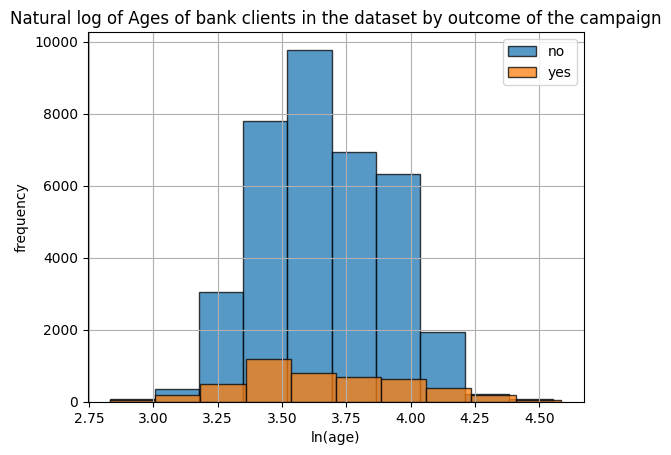

In [17]:
bankdata['lnage'] = np.log(bankdata['age'])

bankdata.groupby('y')['lnage'].hist(alpha = 0.75, edgecolor = 'black', legend = True)
plt.title('Natural log of Ages of bank clients in the dataset by outcome of the campaign')
plt.xlabel('ln(age)')
plt.ylabel('frequency')
plt.show()

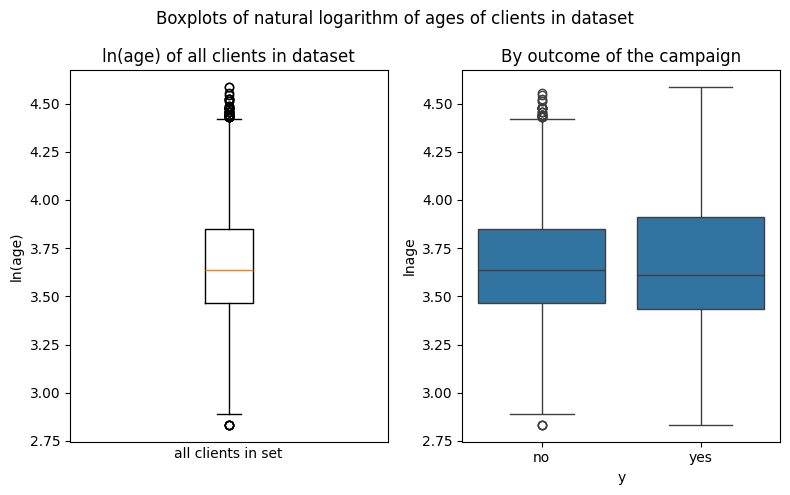


After applying the transformation, there is a total of [70] outliers in the set.


In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Boxplots of natural logarithm of ages of clients in dataset')
#First plot: boxplot of age for full set
boxplot = axes[0].boxplot(bankdata['lnage'])
axes[0].set_xlabel('all clients in set')
axes[0].set_xticks([])
axes[0].set_ylabel('ln(age)')
axes[0].set_title('ln(age) of all clients in dataset')
##Count outliers after transformation:
outliers_count = [len(fliers.get_ydata()) for fliers in boxplot['fliers']]

#Second plot: by outcome of campaign
sns.boxplot(data = bankdata, x = 'y', y = 'lnage', ax = axes[1])
axes[1].set_title('By outcome of the campaign')
plt.tight_layout()
plt.show()

print()
print(f'After applying the transformation, there is a total of {outliers_count} outliers in the set.')

While the transformation does not produce a perfectly symmetrical graph, it does mitigate the pronounced original skewness of the 'age' feature and reduces the number of outliers from 469 to 70 (an 85\% reduction); this is a better feature to employ in the classifier algorithms going forward.

In [19]:
#Drop the original age and keep only the ln(age)
bankdata.drop('age', axis = 1, inplace = True)

###'campaign' feature (number of contacts carried out with the clients in the set during current campaign)

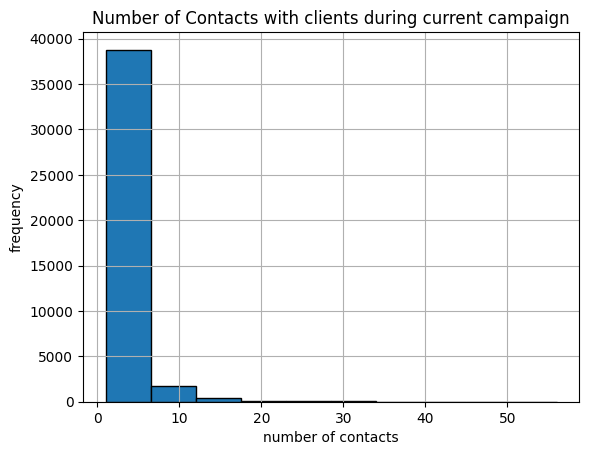

In [20]:
#Campaign - full dataset
bankdata.campaign.hist(edgecolor = 'black')
plt.title('Number of Contacts with clients during current campaign')
plt.xlabel('number of contacts')
plt.ylabel('frequency')
plt.show()

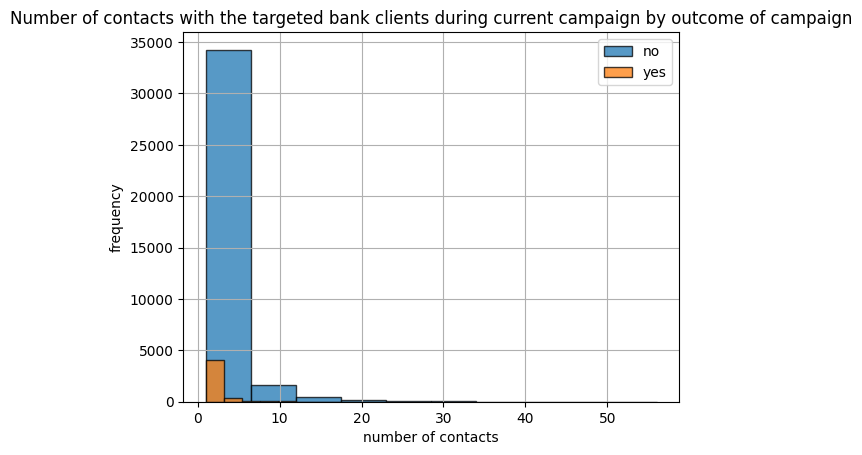

In [21]:
#By campaign outcome
bankdata.groupby('y')['campaign'].hist(alpha = 0.75, edgecolor = 'black', legend = True)
plt.title('Number of contacts with the targeted bank clients during current campaign by outcome of campaign')
plt.xlabel('number of contacts')
plt.ylabel('frequency')
plt.show()

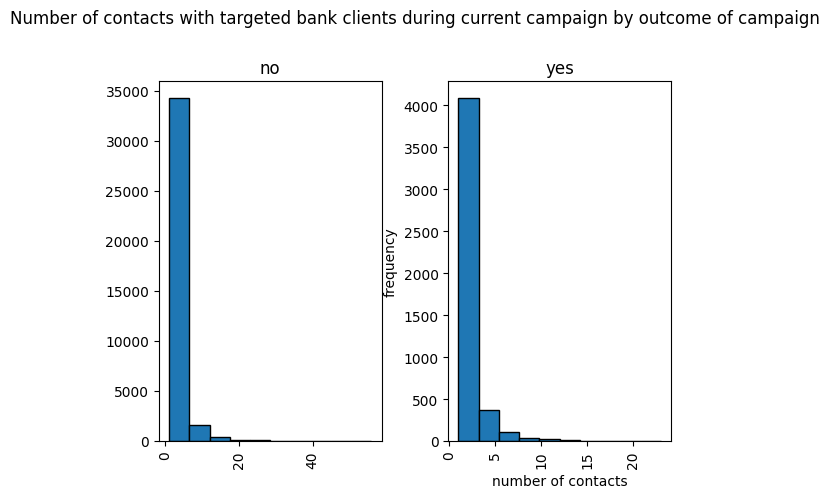

In [22]:
#Separate by campaign outcome
bankdata['campaign'].hist(by = bankdata['y'], edgecolor = 'black')
plt.suptitle('Number of contacts with targeted bank clients during current campaign by outcome of campaign', y = 1.05)
plt.xlabel('number of contacts')
plt.ylabel('frequency')
plt.show()

Again, the shape of the distribution is similar (skewed right) for both groups; however, the group of clients who did sign up for the long-term deposit instrument being marketed had a lower maximum value for this variable than the group who did not take up the offer. This makes intuitive sense, as the marketers would continue contacting only those clients who have not signed up, not the ones who already did.

In [23]:
bankdata['campaign'].describe()

,campaign
count,41188.000000
mean,2.567593
std,2.770014
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


In [24]:

bankdata.groupby('y').agg({'campaign':['min', 'median', 'max', 'mean', 'std']})

campaign                               
         min median max      mean       std
y                                          
no         1    2.0  56  2.633085  2.873438
yes        1    2.0  23  2.051724  1.666245

<Axes: xlabel='y', ylabel='campaign'>

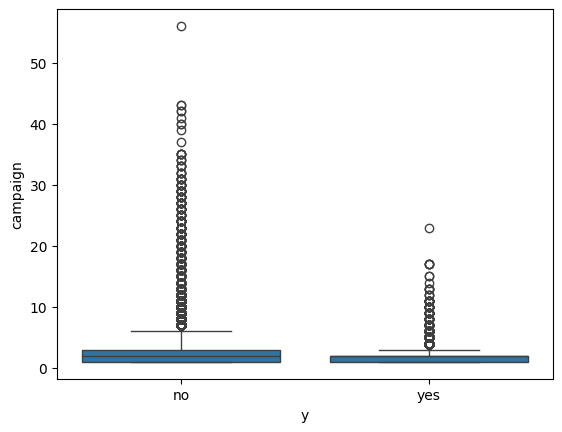

In [25]:
sns.boxplot(data = bankdata, x = 'y', y = 'campaign')

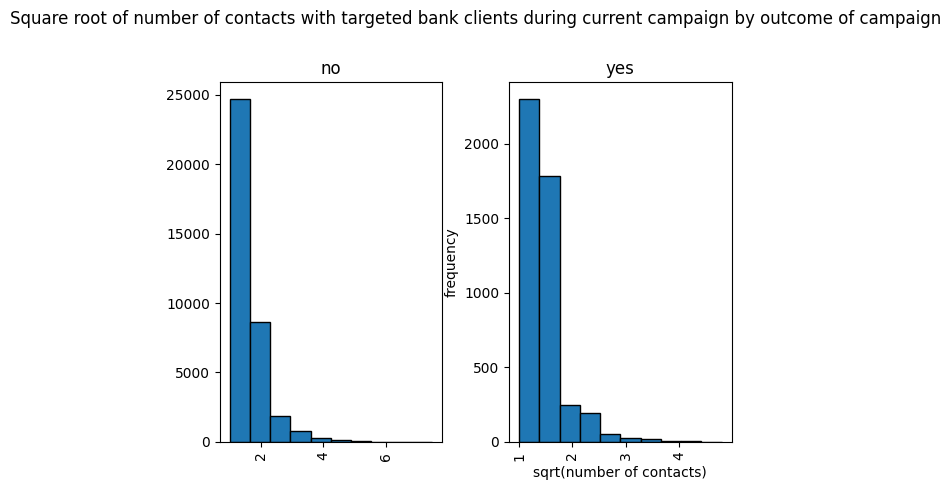

In [26]:
# Transform feature 'campaign'
#Since there are (MANY) zeros in this feature, natural log would not be appropriate
bankdata['sqrtcampaign'] = np.sqrt(bankdata['campaign'])

bankdata['sqrtcampaign'].hist(by = bankdata['y'], edgecolor = 'black')
plt.suptitle('Square root of number of contacts with targeted bank clients during current campaign by outcome of campaign', y = 1.05)
plt.xlabel('sqrt(number of contacts)')
plt.ylabel('frequency')
plt.show()

The transformation is clearly not successful in mitigating the skewness of this feature.

In [27]:
#Cumulative relative frequency for 'campaign' value by outcome of campaign ('y)
CT = pd.crosstab(bankdata['campaign'], bankdata['y'], normalize = 'columns')
cumCT = CT.cumsum(axis = 0)
print(cumCT)

y               no       yes
campaign                    
1         0.419777  0.495690
2         0.675851  0.756681
3         0.806282  0.880388
4         0.872004  0.934052
5         0.912471  0.959914
6         0.937206  0.976078
7         0.953376  0.984267
8         0.963856  0.987931
9         0.971134  0.991595
10        0.976962  0.994181
11        0.981476  0.996767
12        0.984814  0.997414
13        0.987222  0.998276
14        0.989083  0.998491
15        0.990424  0.998922
16        0.991819  0.998922
17        0.993296  0.999784
18        0.994199  0.999784
19        0.994911  0.999784
20        0.995732  0.999784
21        0.996388  0.999784
22        0.996853  0.999784
23        0.997264  1.000000
24        0.997674  1.000000
25        0.997893  1.000000
26        0.998112  1.000000
27        0.998413  1.000000
28        0.998632  1.000000
29        0.998906  1.000000
30        0.999097  1.000000
31        0.999289  1.000000
32        0.999398  1.000000
33        0.99

However, the actual numerical value of this feature may not be necessary for a classifier --rather, whether the number of contacts carried out with a client during the current campaign exceeds some threshold value. We notice from comparing the distribution of values by outcome of the campaign that barely any clients who take 10 contacts or more actually sign up for the long-term deposit (0.84\%). Thus, I propose that instead of using the actual value of 'campaign' we use a binary filter that indicates whether this value is less than 10 (which would be aligned with 'y' = 'yes', or success), or not (aligned with 'y' = 'no').

In [28]:
#Create indicator for campaign<10
bankdata['campaignunder10'] = np.where(bankdata['campaign'] < 10, 1, 0)


In [29]:
#Drop original 'campaign' and the artificial 'sqrtcampaign' features
bankdata.drop(['campaign', 'sqrtcampaign'], axis = 1, inplace = True)


In [30]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job              41188 non-null  object 
 1   marital          41188 non-null  object 
 2   education        41188 non-null  object 
 3   default          41188 non-null  object 
 4   housing          41188 non-null  object 
 5   loan             41188 non-null  object 
 6   contact          41188 non-null  object 
 7   month            41188 non-null  object 
 8   day_of_week      41188 non-null  object 
 9   pdays            41188 non-null  int64  
 10  previous         41188 non-null  int64  
 11  poutcome         41188 non-null  object 
 12  emp.var.rate     41188 non-null  float64
 13  cons.price.idx   41188 non-null  float64
 14  cons.conf.idx    41188 non-null  float64
 15  euribor3m        41188 non-null  float64
 16  nr.employed      41188 non-null  float64
 17  y           

###'pdays' feature (number of days passed after client was contacted during previous campaign)
This quantitative variable has a special value (pdays = 999) to represent clients who were not contacted at all during the previous campaign. That is, there is some categorization embedded into 'pdays'.

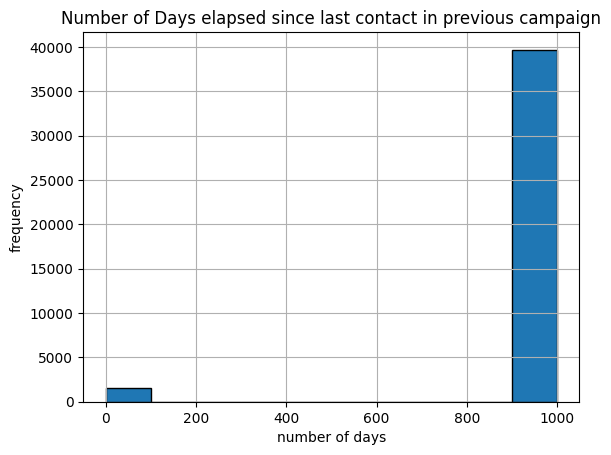

In [31]:
#pdays (number of days passed by after the client was contacted during previous campaign; 999=no contact in prev camp)
bankdata.pdays.hist(edgecolor = 'black')
plt.title('Number of Days elapsed since last contact in previous campaign')
plt.xlabel('number of days')
plt.ylabel('frequency')
plt.show()

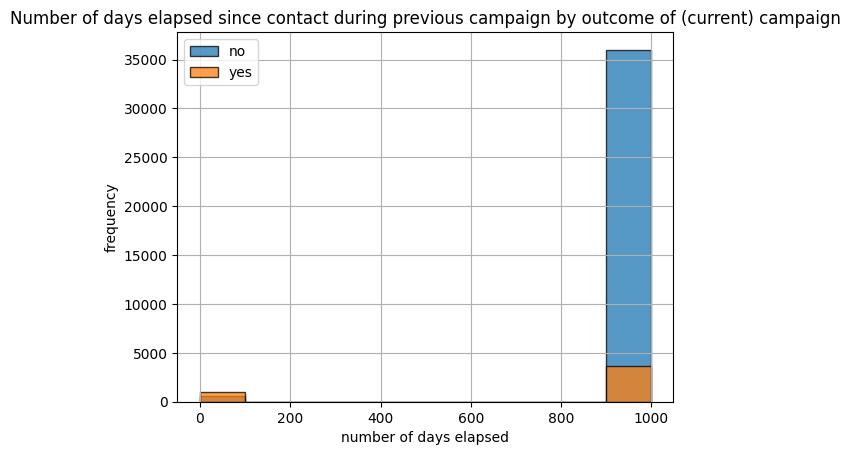

In [32]:
bankdata.groupby('y')['pdays'].hist(alpha = 0.75, edgecolor = 'black', legend = True)
plt.title('Number of days elapsed since contact during previous campaign by outcome of (current) campaign')
plt.xlabel('number of days elapsed')
plt.ylabel('frequency')
plt.show()

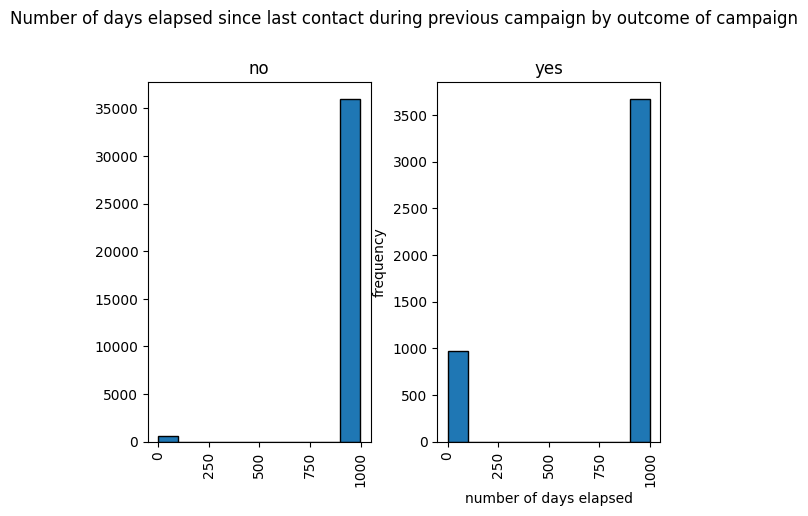

In [33]:
bankdata['pdays'].hist(by = bankdata['y'], edgecolor = 'black')
plt.suptitle('Number of days elapsed since last contact during previous campaign by outcome of campaign', y = 1.05)
plt.xlabel('number of days elapsed')
plt.ylabel('frequency')
plt.show()

In [34]:
#print(pd.pivot_table(bankdata, index = 'y', columns = 'pdays', aggfunc = 'count', margins = True, fill_value = 0).T)
pd.crosstab(bankdata['pdays'], bankdata['y'], margins = True)

y,no,yes,All
pdays,,,
0,5,10,15
1,18,8,26
2,24,37,61
3,141,298,439
4,55,63,118
5,17,29,46
6,123,289,412
7,20,40,60
8,6,12,18


A couple of interesting facts associated with this analysis:
* 39,673 out of 41,188 clients targeted during this marketing campaign were not contacted during the previous one (indicated by the fact that pdays = 999). This is, 96.32\% of the current campaign is run on clients that were not targeted in the previous one(s).
* the proportion of conversion (success of the marketing campaign) for these 'new' clients (that is, not targeted in the previous campaigns) is roughly 9.26\%, compared to the overall conversion success of 11.27\%.

In [35]:
bankdata.groupby('y')['pdays'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,984.113878,120.656868,0.0,999.0,999.0,999.0,999.0
yes,4640.0,792.035560,403.407181,0.0,999.0,999.0,999.0,999.0


 It is noticeable that while the minimum value for this variable is zero (meaning zero days elapsed since client was contacted during previous campaign -- previous day contact?), the first quartile for this variable is already 999. This means that at most 25% of the rows in the dataset actually represent clients that were contacted in the previous campaign.

In [36]:
#Explore pdays a little more

bankdata['pdays'].value_counts(normalize = True)

,proportion
pdays,
999,0.963217
3,0.010658
6,0.010003
4,0.002865
9,0.001554
2,0.001481
7,0.001457
12,0.001408
10,0.001263


We see that 96.32\% of the rows have a value of 999 in this variable. Only 1515 rows (under 4\%) actually provide useful information about how many days passed since last contact during previous campaign. This seems a strong argument to eliminate this feature from the analysis. **but be careful here because y = 1 is correlating with smaller values of pdays, so perhaps just transform it into binary to say whether client was contacted in previous campaign!**

In [37]:
#Separate rows where pdays is not 999
pdays1 = bankdata.loc[bankdata['pdays']!=999]


In [38]:
pdays1['pdays'].describe()

,pdays
count,1515.000000
mean,6.014521
std,3.824906
min,0.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,27.000000


In [39]:
pd.crosstab(pdays1.pdays, pdays1.y, normalize = 'all')

y,no,yes
pdays,,
0,0.003300,0.006601
1,0.011881,0.005281
2,0.015842,0.024422
3,0.093069,0.196700
4,0.036304,0.041584
5,0.011221,0.019142
6,0.081188,0.190759
7,0.013201,0.026403
8,0.003960,0.007921


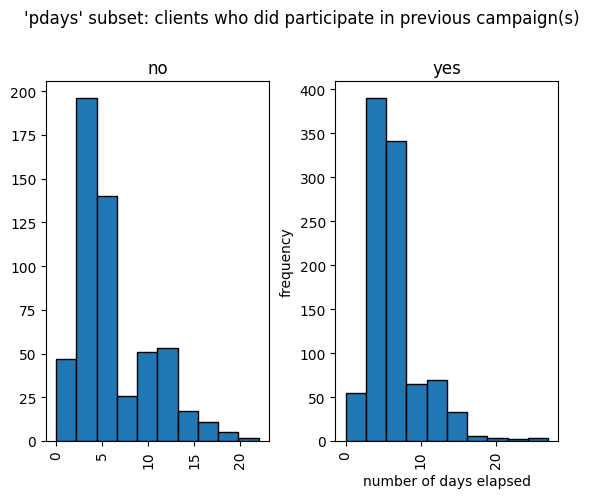

In [40]:
pdays1['pdays'].hist(by = pdays1['y'], edgecolor = 'black')
plt.suptitle('\'pdays\' subset: clients who did participate in previous campaign(s)', y = 1.05)
plt.xlabel('number of days elapsed')
plt.ylabel('frequency')
plt.show()

<Axes: xlabel='pdays', ylabel='Count'>

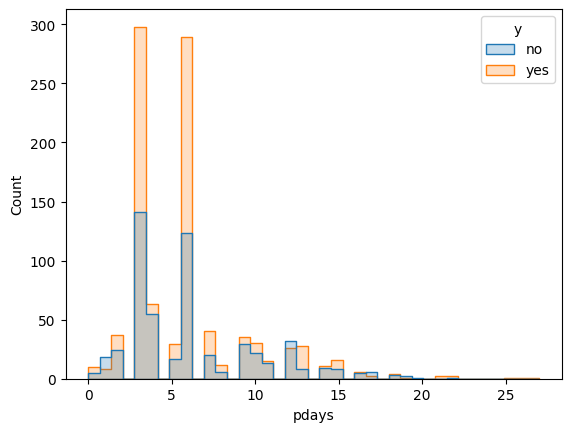

In [41]:
sns.histplot(data = pdays1, x = 'pdays', hue = 'y' , element = 'step')

Although there are some noticeable differences in the  distribution of the values of the feature 'pdays' that correspond to actual values (that is, where pdays $\ne$ 999) depending on the campaign outcome, the fact that not even 4\% of the rows in the dataset contain an actual informative value for this feature, I will only use 'pdays' as an indicator of whether the client was actually targeted during previous campaigns. This will be done next, by examining the feature 'poutcome'.

In [42]:
print(pd.crosstab(bankdata.pdays, bankdata.poutcome))

poutcome  failure  nonexistent  success
pdays                                  
0               0            0       15
1               0            0       26
2               0            0       61
3               4            0      435
4               2            0      116
5               4            0       42
6              25            0      387
7              15            0       45
8               6            0       12
9              24            0       40
10              7            0       45
11              3            0       25
12             13            0       45
13              8            0       28
14              5            0       15
15              9            0       15
16              2            0        9
17              5            0        3
18              5            0        2
19              1            0        2
20              1            0        0
21              2            0        0
22              0            0        3


Although we would expect that here all the samples with pdays = 999 should have been coded as poutcome = 'nonexistent', some were coded (inaccurately) as "failures" during the previous campaign.

Will recode the values of 'poutcome' to 'nonexistent' for samples such that pdays = 999:

In [43]:
#recode the values of 'poutcome' to 'nonexistent' for samples such that pdays = 999
#(and leave poutcome untouched otherwise)

bankdata['poutcome'] = np.where((bankdata['pdays'] == 999) & (bankdata['poutcome'] == 'failure'), 'nonexistent', bankdata['poutcome'])

In [44]:
#Check recoding
print(pd.crosstab(bankdata.pdays, bankdata.poutcome))

poutcome  failure  nonexistent  success
pdays                                  
0               0            0       15
1               0            0       26
2               0            0       61
3               4            0      435
4               2            0      116
5               4            0       42
6              25            0      387
7              15            0       45
8               6            0       12
9              24            0       40
10              7            0       45
11              3            0       25
12             13            0       45
13              8            0       28
14              5            0       15
15              9            0       15
16              2            0        9
17              5            0        3
18              5            0        2
19              1            0        2
20              1            0        0
21              2            0        0
22              0            0        3


##### Drop 'pdays' after recoding poutcome
Success! We will proceed by dropping the 'pdays' feature, given the extremely low proportion of rows that actually have useful information about this quantity.

In [45]:
bankdata.drop('pdays', axis = 1, inplace = True)
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job              41188 non-null  object 
 1   marital          41188 non-null  object 
 2   education        41188 non-null  object 
 3   default          41188 non-null  object 
 4   housing          41188 non-null  object 
 5   loan             41188 non-null  object 
 6   contact          41188 non-null  object 
 7   month            41188 non-null  object 
 8   day_of_week      41188 non-null  object 
 9   previous         41188 non-null  int64  
 10  poutcome         41188 non-null  object 
 11  emp.var.rate     41188 non-null  float64
 12  cons.price.idx   41188 non-null  float64
 13  cons.conf.idx    41188 non-null  float64
 14  euribor3m        41188 non-null  float64
 15  nr.employed      41188 non-null  float64
 16  y                41188 non-null  object 
 17  lnage       

In [46]:
#Explore quality of information regarding clients not contacted during previous campaigns
#pdays = 999 menas client was not previously contacted
#previous = number of contacs performed before this campaign

print(pd.crosstab(bankdata.previous, bankdata.poutcome))

poutcome  failure  nonexistent  success
previous                               
0               0        35563        0
1               0         3696      865
2              85          349      320
3              38           50      128
4              18           12       40
5               1            2       15
6               0            1        4
7               0            0        1


We can see that most of the samples (rows) with pdays = 999 indeed report zero contacts with client performed before this campaign, which is consistent with the meaning of the 999 code. There are, nonetheless, a number of such coded rows that report a nonzero number of contacts with the client prior to the current campaign. This corresponds (presumably) to clients who were not officially targeted by previous campaigns (so pdays = 999) but were still contacted prior to the current campaign, for potentially other reasons.

We can also bring the variable 'poutcome' (the outcome of the previous marketing campaign) into the analysis:

###'previous' feature: number of contacts carried out with client before current campaign

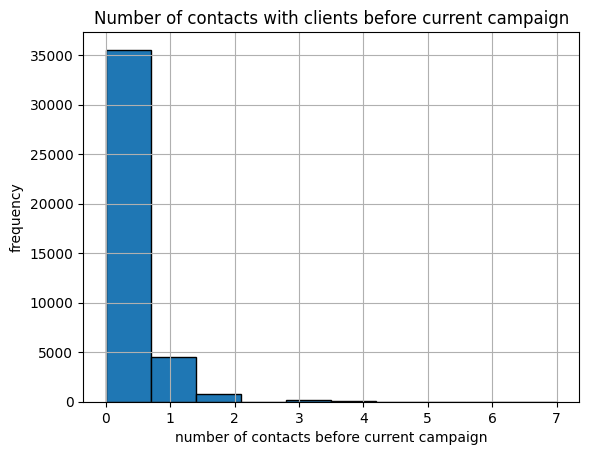

In [47]:
#Full dataset
bankdata.previous.hist(edgecolor = 'black')
plt.title('Number of contacts with clients before current campaign')
plt.xlabel('number of contacts before current campaign')
plt.ylabel('frequency')
plt.show()

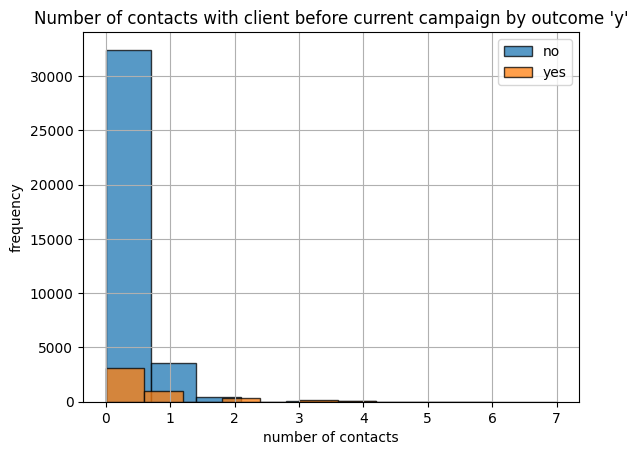

In [48]:
#Colored by campaign outcome
bankdata.groupby('y')['previous'].hist(alpha = 0.75, edgecolor = 'black', legend = True)
plt.title('Number of contacts with client before current campaign by outcome \'y\'')
plt.xlabel('number of contacts')
plt.ylabel('frequency')
plt.show()

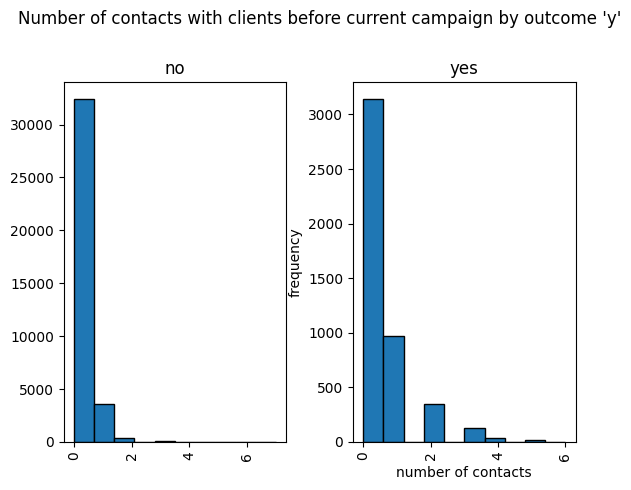

In [49]:
#Separate by campaign outcome
bankdata['previous'].hist(by = bankdata['y'], edgecolor = 'black')
plt.suptitle('Number of contacts with clients before current campaign by outcome \'y\'', y = 1.05)
plt.xlabel('number of contacts')
plt.ylabel('frequency')
plt.show()


In [50]:
pd.crosstab(bankdata['previous'], bankdata['y'], normalize = 'columns')

y,no,yes
previous,,
0,0.887107,0.676940
1,0.098336,0.208405
2,0.011054,0.075431
3,0.002408,0.027586
4,0.000876,0.008190
5,0.000137,0.002802
6,0.000055,0.000647
7,0.000027,0.000000


It should be noted that this is yet another highly skewed feature, though the range of values is certainly more moderate than for some other features (such as 'age').

###'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', and 'nr.employed' (socio-economic context-related features)

We now move on to the economy-related features included in the set. The values of these variables do not pertain directly to each of the clients targeted during the marketing campaign; rather, they correspond to the specific characteristics of the Portuguese social and economic context at the specific moment when either a client signs up for the term deposit instrument, or when it has been determined that they won't (end of the campaign).

**Employment variation rate:** Quarterly indicator of the variation in the employment rate. Positive values are typically associated with economic growth, whereas during recessions, companies/industries may decrease hiring rates or halt them altogether, leading to a contraction in employment.  [Understanding and calculating employment rates](https://accountinginsights.org/understanding-and-calculating-employment-rates-and-influences/)

**Consumer Price Index:** This indicator measures the monthly change in prices paid by consumers in an economy. It is typically calculated as a weighted average of prices for a representative basket of goods and services, and it is a widely used measure of inflation. [CPI - Investopedia](https://www.investopedia.com/terms/c/consumerpriceindex.asp)

**Consumer Confidence Index:** This index measures whether consumers feel optimistic or pessimistic about the state of the economy. According to [theglobaleconomy.com](https://www.theglobaleconomy.com/Portugal/consumer_confidence_survey/), the survey used to build this indicator "contains standardized questions about the financial situation of households, general economic situation, inflation, unemployment, saving, intentions of making major purchases on durable goods or purchasing/building a home, or buying a car". The most recent value for this index in -15.1 (January 2025), with the historical average from June 1986 to January 2025 being -14.68 points. The historical maximum is 7.1 points, corresponding to October 1987, whereas the historical minimum of -47.6 points was recorded 25 years later (October 2012).

**Euribor 3 month rate:** This is a financial market indicator that shows the average interest rate on short-term loans in the European banking sector over a three-month period. "Euribor" is short for Euro Interbank Offered Rate. [Euribor Rates](https://www.euribor-rates.eu/en/what-is-euribor/)

**Number of employees:** This is the number of employed people in Portugal, which, according to Statista, refers to "people who during a pre-defined period either a) performed wage or salary work, b) held a formal attachment to their job (even if not currently working), c) performed for-profit work for personal or family gain, or d) were with an enterprise although themporarily not at work for any specific reason." [Portugal: Employment from 2015 to 2025](https://www.statista.com/statistics/795372/employment-in-portugal/)


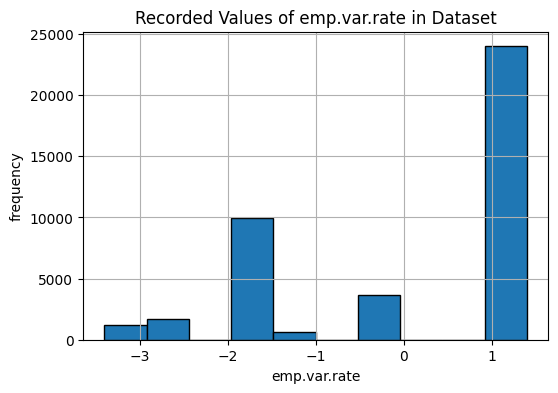

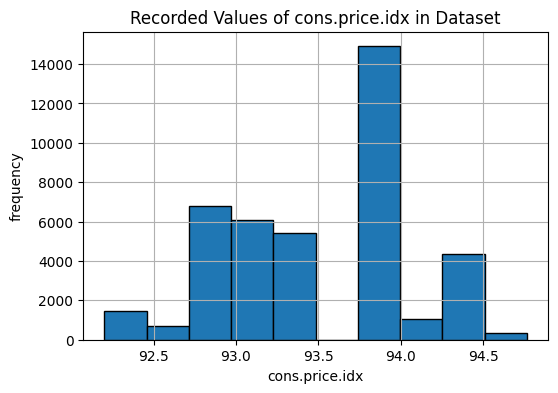

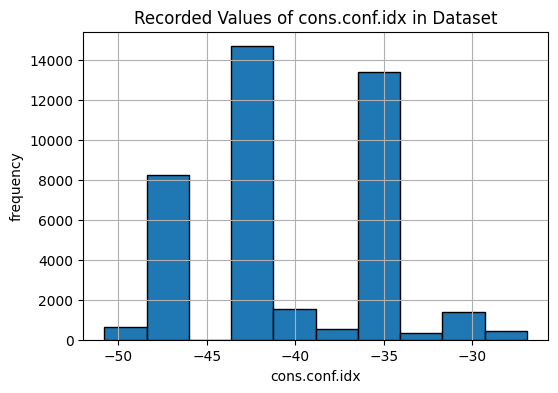

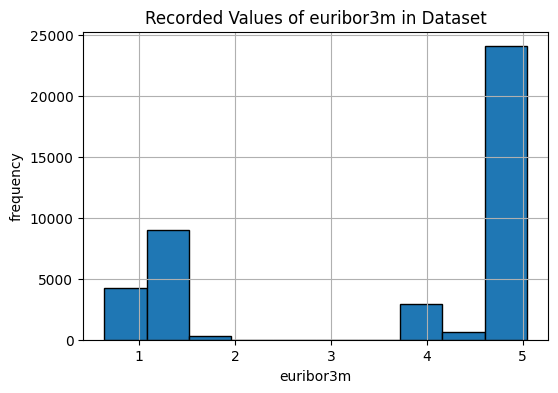

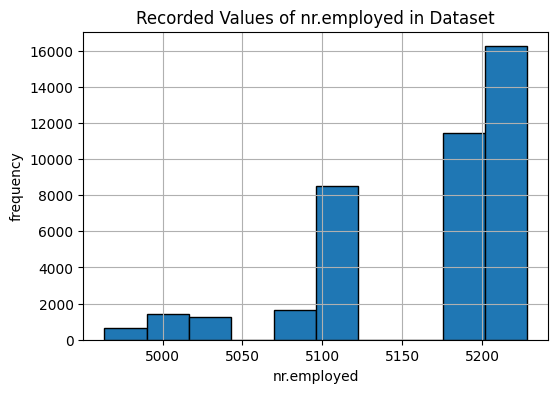

In [51]:
socioec = pd.DataFrame(bankdata, columns=['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])

for column in socioec:
  plt.figure(figsize = (6,4))
  socioec[column].hist(edgecolor = 'black')
  plt.title(f'Recorded Values of {column} in Dataset')
  plt.xlabel(column)
  plt.ylabel('frequency')
  plt.show()

Text(0.5, 1.03, 'Pairwise scatterplots for socioeconomic features')

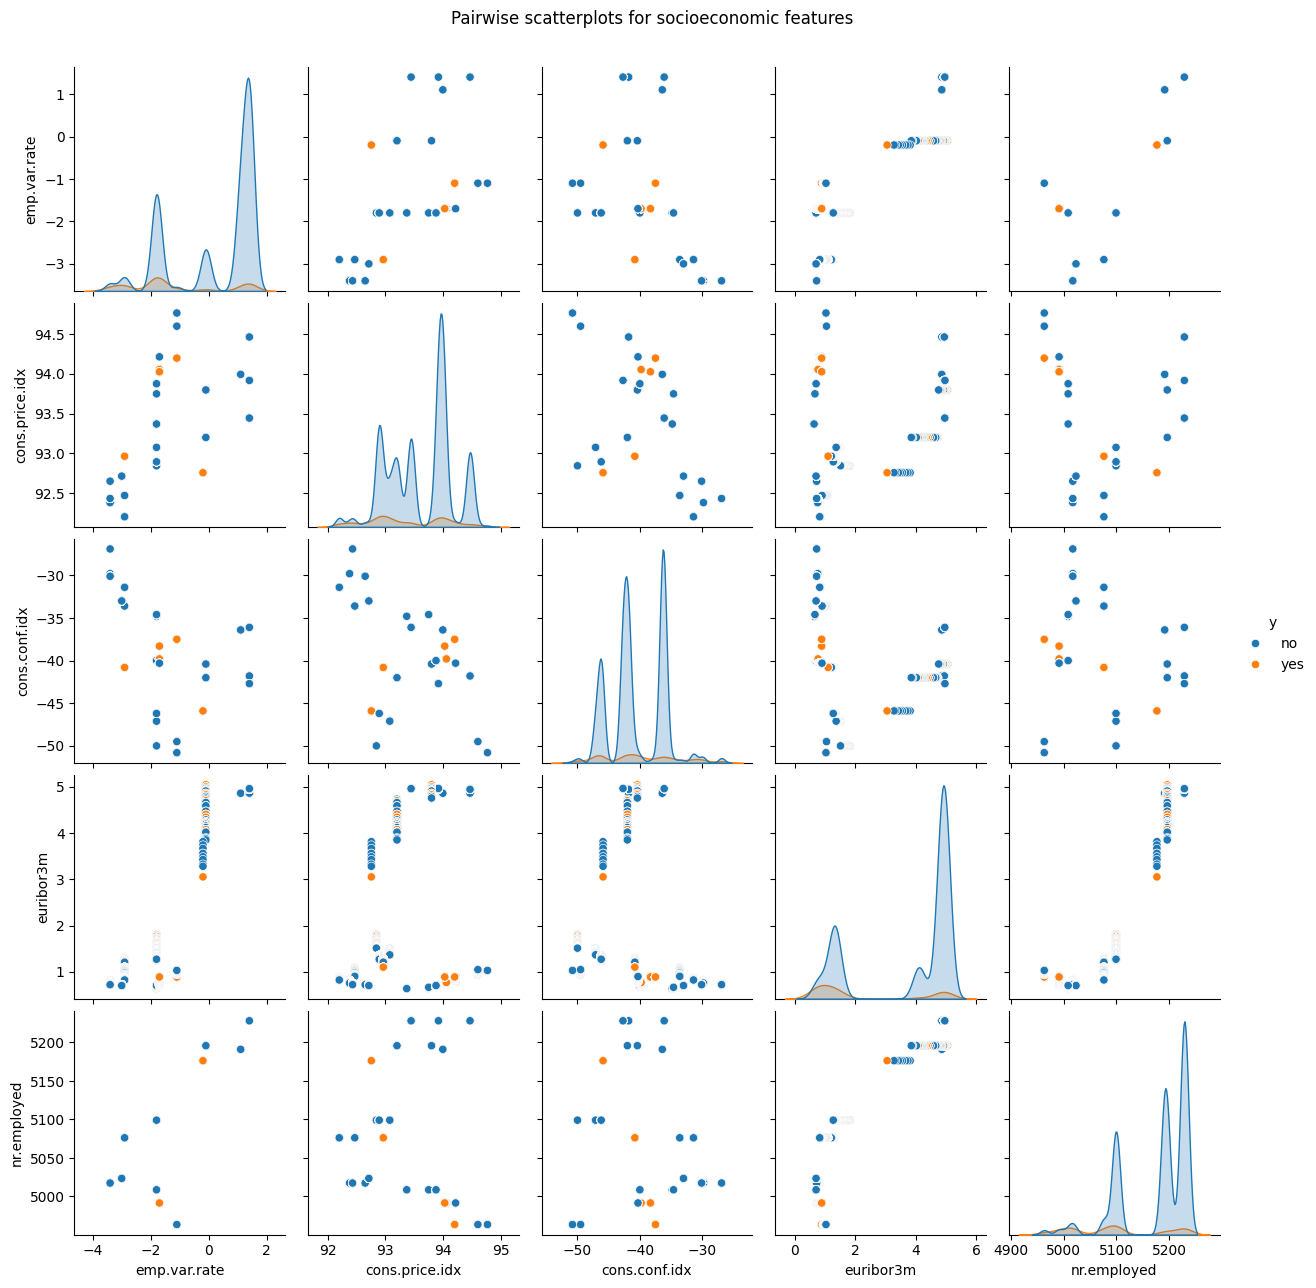

In [52]:
#exploration of the socio-economic features that were added to the set
sns.pairplot(vars = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], data = bankdata, \
             hue = 'y').fig.suptitle('Pairwise scatterplots for socioeconomic features', y = 1.03)

Note that these variables are not associated with the clients themselves (they are not client attributes, but rather characteristics of the socio-economic environment at the time of the marketing campaign). Thus, it is not totally surprising that the values are somewhat clustered.

####Insights that we can extract from these plots:
* the scale for each of these variables is very different, so it will be important to use a scaler in the models that we will be fitting.
* there may be inherent dependencies/correlations between these variables, as they all refer to the same economy; in fact it is noticeable that the consumer confidence index seems to hold an inverse relationship with the consumer price index and, to a lesser degree, with the employment variation rate.
* the employment variation rate and the number of employed people are positively correlated (not surprisingly), whereas the number of employees appears to also be positively correlated with the euribor 3-month rate.
* from the density plots along the diagonal, it is evident that none of these
features is close to having a normal distribution, so instead of a standard
scaler it may be better to use a minmax scaler to bring all the values to the
same [0,1] interval.

Correlation matrix:
                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000  


<Axes: >

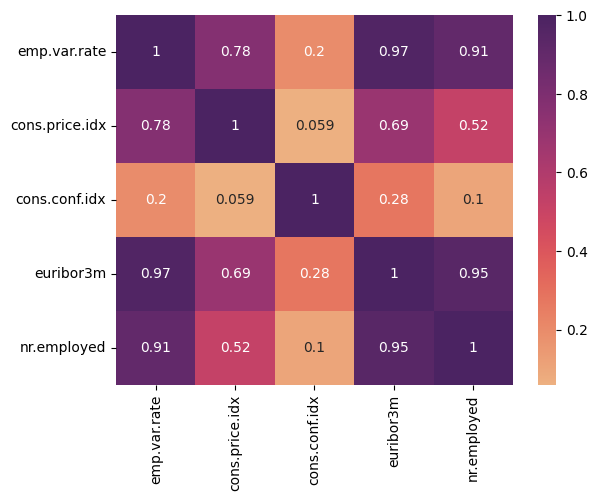

In [53]:
#Examine degree of correlation between these variables

corrmatrix = socioec.corr()
print('Correlation matrix:')
print(corrmatrix)
sns.heatmap(socioec.corr(), annot = True, cmap = 'flare')

We can appreciate that there is a high degree of correlation between the variables 'euribor3m', 'emp.var.rate', and 'nr.employed'. Since highly correlated variables convey similar information, keeping all of them can be counterproductive, as the complexity of numerical algorithms increases with higher dimensionality, which could even lead to errors. Out of the three variables mentioned, we will keep the Euribor 3-month rate to simplify the analysis.

In [54]:
#Drop highly correlated variables 'emp.var.rate' and 'nr.employed'

bankdata.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace = True)
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job              41188 non-null  object 
 1   marital          41188 non-null  object 
 2   education        41188 non-null  object 
 3   default          41188 non-null  object 
 4   housing          41188 non-null  object 
 5   loan             41188 non-null  object 
 6   contact          41188 non-null  object 
 7   month            41188 non-null  object 
 8   day_of_week      41188 non-null  object 
 9   previous         41188 non-null  int64  
 10  poutcome         41188 non-null  object 
 11  cons.price.idx   41188 non-null  float64
 12  cons.conf.idx    41188 non-null  float64
 13  euribor3m        41188 non-null  float64
 14  y                41188 non-null  object 
 15  lnage            41188 non-null  float64
 16  campaignunder10  41188 non-null  int64  
dtypes: float64(4

##**EDA Categorical Features**

### Job, Marital Status and Educational Level of Bank Clients in the Dataset

[Text(0.5, 1.0, 'Job types for bank clients contacted during marketing campaign')]

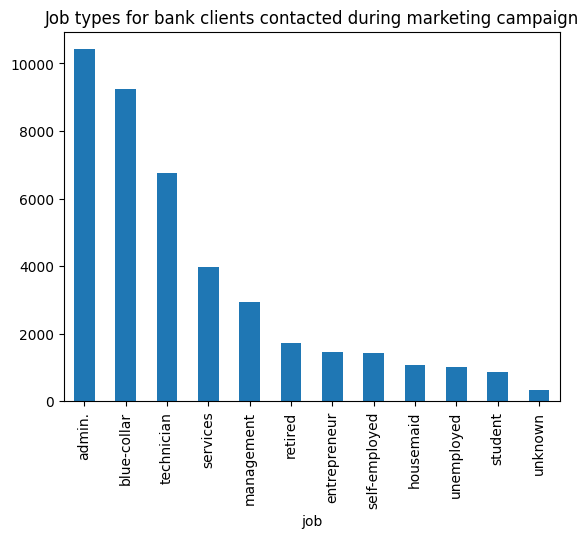

In [55]:
#Job types - full dataset
bankdata.job.value_counts().plot.bar().set(title = 'Job types for bank clients contacted during marketing campaign')

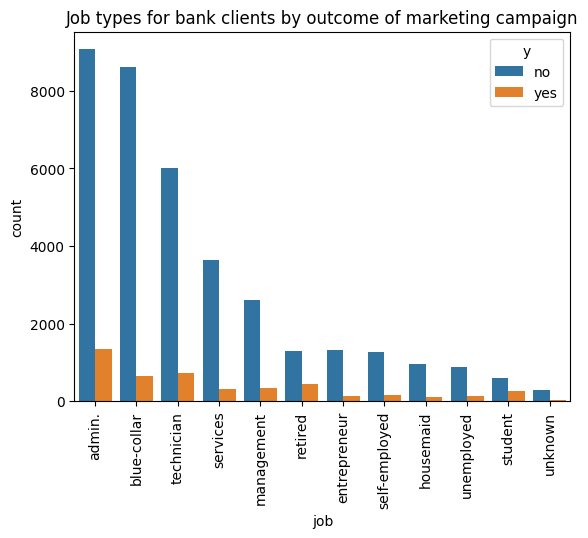

In [56]:
#By campaign outcome
sns.countplot(data = bankdata, x = 'job', order = bankdata['job'].value_counts().index, hue = 'y').set(title = 'Job types for bank clients by outcome of marketing campaign')
plt.xticks(rotation = 90)
plt.show()

In [60]:
#Breakdown of job categories by campaign outcome
print(pd.crosstab(bankdata.job, bankdata.y, normalize = 'index').sort_values('yes', ascending = False))

y                    no       yes
job                              
student        0.685714  0.314286
retired        0.747674  0.252326
unemployed     0.857988  0.142012
admin.         0.870274  0.129726
management     0.887825  0.112175
unknown        0.887879  0.112121
technician     0.891740  0.108260
self-employed  0.895144  0.104856
housemaid      0.900000  0.100000
entrepreneur   0.914835  0.085165
services       0.918619  0.081381
blue-collar    0.931057  0.068943


In [61]:
#Overall jobs distribution
print(bankdata['job'].value_counts(ascending = False)/len(bankdata['job']))

job
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: count, dtype: float64


The tables above show the varying levels of campaign success by job type: we see that the highest (relative) success rate corresponds to student clients, followed by retirees and unemployed clients --which may seem surprising; however, it is important to remember that the proportion of these categories is rather small with respect to the total dataset (2.12\%, 4.18\%, and 2.46\%, respectively). The lowest success rate for the campaign corresponds to blue-collar workers.

In absolute terms,

Text(0.5, 1.0, 'Marital status of clients in Dataset')

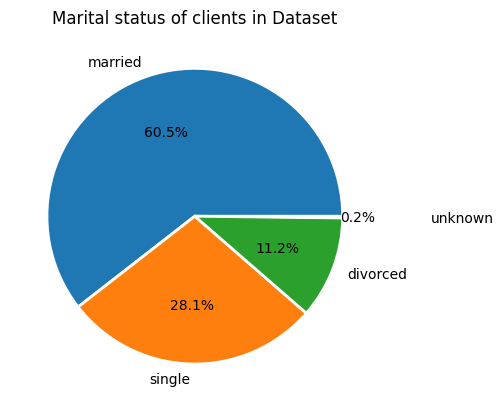

In [62]:
#Marital status of clients in full set
plt.pie(x = bankdata.marital.value_counts(), labels = bankdata.marital.value_counts().index, autopct = '%1.1f%%',\
        wedgeprops = {'linewidth': 2.0, 'edgecolor': 'white'}, explode = (0, 0, 0, 0.5))
plt.title('Marital status of clients in Dataset')

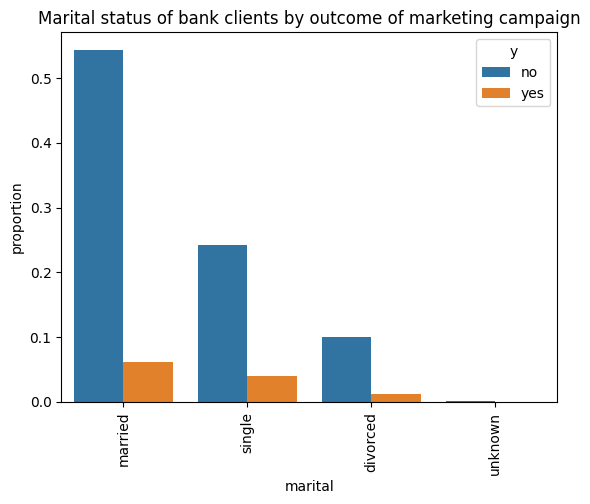

In [63]:
#Marital status of clients in dataset by campaign outcome
sns.countplot(data = bankdata, x = 'marital', hue = 'y', stat = 'proportion').set(title = 'Marital status of bank clients by outcome of marketing campaign')
plt.xticks(rotation = 90)
plt.show()

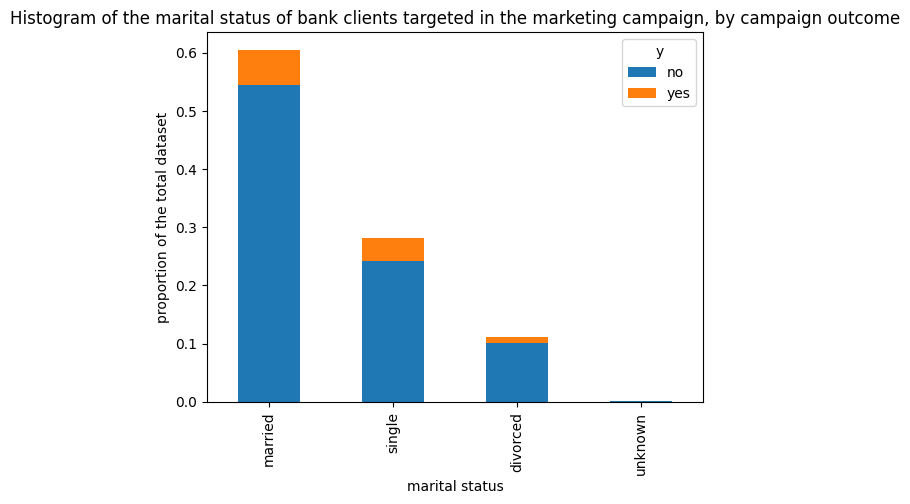

In [64]:
CTmarital =pd.crosstab(bankdata.marital, bankdata.y, normalize = 'all').sort_values('yes', ascending = False)
CTmarital.plot(kind = 'bar', stacked = True)
plt.title('Histogram of the marital status of bank clients targeted in the marketing campaign, by campaign outcome')
plt.xlabel('marital status')
plt.ylabel('proportion of the total dataset')
plt.show()

Broad interpretations about the 'unknown' marital status do not make sense, as barly 0.2\% of the observations in the dataset fall in this category. We can see, nonetheless, that the marketing campaign seems to have had higher relative success with clients who are single (14\%), as opposed to those who are married or divorced (10.32\% and 10.16\%, respectively).

[Text(0.5, 1.0, 'Educational level of bank clients targeted during current marketing campaign')]

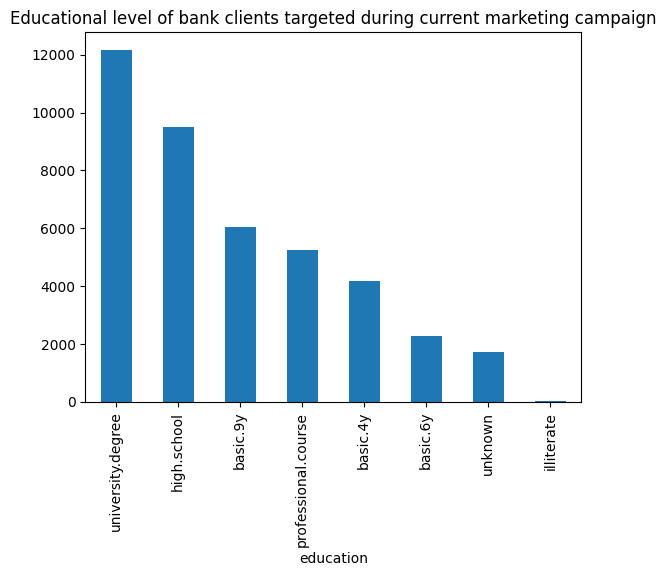

In [66]:
#Education level - full dataset
bankdata.education.value_counts().plot.bar().set(title = 'Educational level of bank clients \
targeted during current marketing campaign')

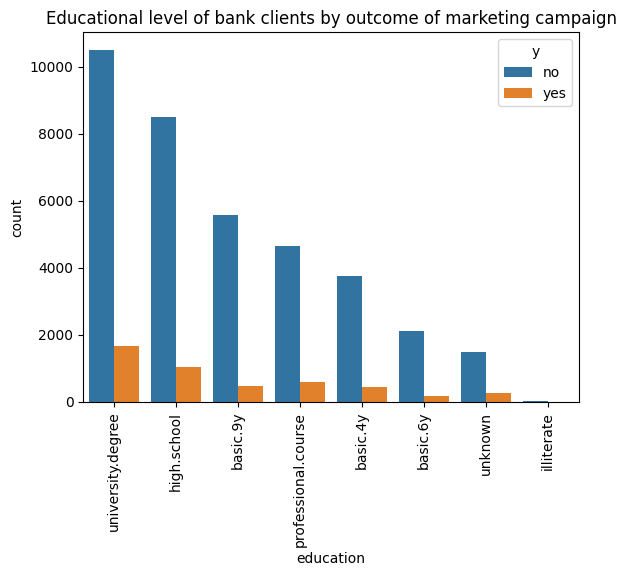

In [67]:
#Educational level of clients - by campaign outcome
sns.countplot(data = bankdata, x = 'education',order = bankdata['education'].value_counts().index, hue = 'y').set(title = 'Educational level\
 of bank clients by outcome of marketing campaign')
plt.xticks(rotation = 90)
plt.show()

In [68]:
print(pd.crosstab(bankdata.education, bankdata.y, normalize = 'index').sort_values('yes', ascending = False))

y                          no       yes
education                              
illiterate           0.777778  0.222222
unknown              0.854997  0.145003
university.degree    0.862755  0.137245
professional.course  0.886515  0.113485
high.school          0.891645  0.108355
basic.4y             0.897510  0.102490
basic.6y             0.917976  0.082024
basic.9y             0.921754  0.078246


In [69]:
print(bankdata['education'].value_counts(ascending = False)/len(bankdata['education']))

education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: count, dtype: float64


Although bank clients reported as illiterate or whose educational level is unknown seem to show a higher success for the marketing campaign, together they make up less than 5\% of the dataset. Among the rest of the categories, it can be observed that the campaign has a higher success rate the more years of education a client has.

###Categorical features related to 'credit risk': default, housing, loan

In [70]:
#default, housing, and loan

creditrisk = bankdata[['default', 'housing', 'loan', 'y']]

print('\n\n Client having defaulted on credit/result of campaign:\n', pd.crosstab(creditrisk.default, creditrisk.y, normalize = 'index'))
print('\n\n Client having housing loan/result of campaign:\n',pd.crosstab(creditrisk.housing, creditrisk.y, normalize = 'index'))
print('\n\n Client having personal loan/result of campaign:\n',pd.crosstab(creditrisk.loan, creditrisk.y, normalize = 'index'))




 Client having defaulted on credit/result of campaign:
 y             no      yes
default                  
no       0.87121  0.12879
unknown  0.94847  0.05153
yes      1.00000  0.00000


 Client having housing loan/result of campaign:
 y              no       yes
housing                    
no       0.891204  0.108796
unknown  0.891919  0.108081
yes      0.883806  0.116194


 Client having personal loan/result of campaign:
 y              no       yes
loan                       
no       0.886598  0.113402
unknown  0.891919  0.108081
yes      0.890685  0.109315


Text(0.5, 0.98, "Success of Marketing Campaign by 'Credit Risk' Factors")

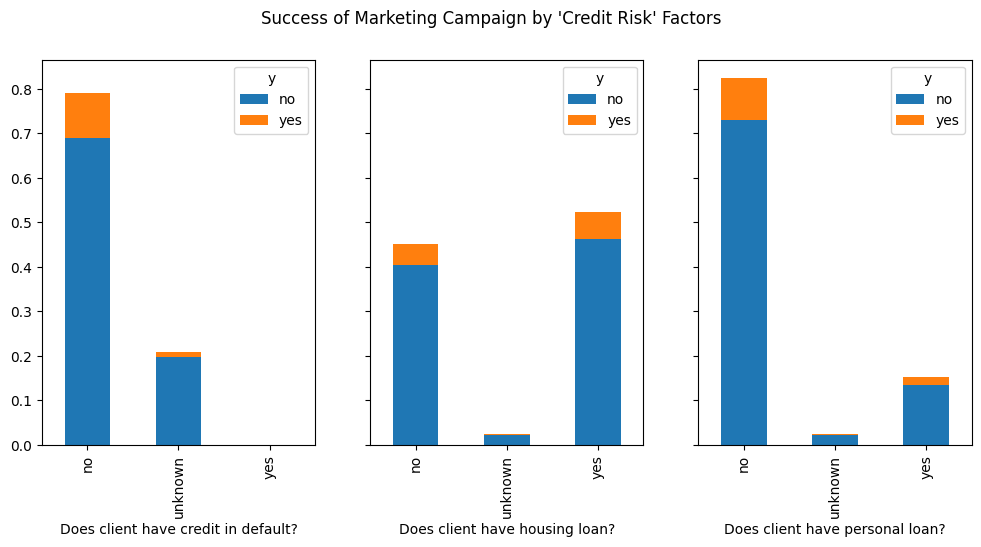

In [71]:
ctdef = pd.crosstab(creditrisk.default, creditrisk.y, normalize = 'all')
cthous = pd.crosstab(creditrisk.housing, creditrisk.y, normalize = 'all')
ctloan = pd.crosstab(creditrisk.loan, creditrisk.y, normalize = 'all')


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 5), sharey = True)

ctdef.plot(kind = 'bar', stacked = True, ax = axes[0], xlabel = 'Does client have credit in default?')
cthous.plot(kind = 'bar', stacked = True, ax = axes[1], xlabel = 'Does client have housing loan?')
ctloan.plot(kind = 'bar', stacked = True, ax = axes[2], xlabel = 'Does client have personal loan?')

fig.suptitle('Success of Marketing Campaign by \'Credit Risk\' Factors')

It is evident that the variable 'default' (in contrast with both 'housing' and 'loan') seems to be determinant in the success of the marketing campaign: no client who has defaulted on their credit agreed to invest in the long-term deposit instrument being marketed (there are only three such cases, so the fact that this is a tiny proportion of the dataset should be taken into account).

### Contact with clients: type, month and day of contact

[Text(0.5, 1.0, 'Contact methods for bank clients targeted during current marketing campaign')]

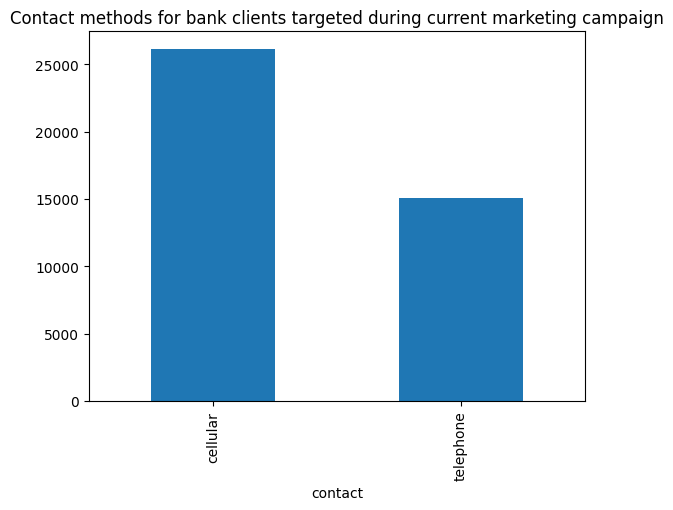

In [72]:
#Contact
bankdata.contact.value_counts().plot.bar().set(title = 'Contact methods for bank clients targeted during current marketing campaign')

Text(0.5, 1.0, 'Type of contact had with clients in Dataset')

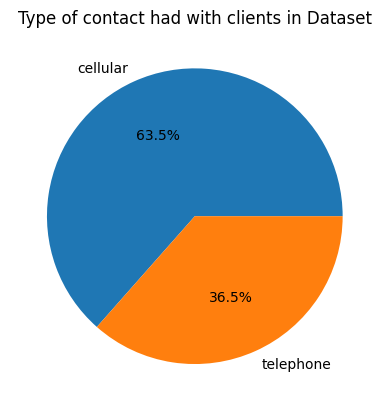

In [73]:
plt.pie(x = bankdata.contact.value_counts(), labels = bankdata.contact.value_counts().index, autopct = '%1.1f%%')
plt.title('Type of contact had with clients in Dataset')

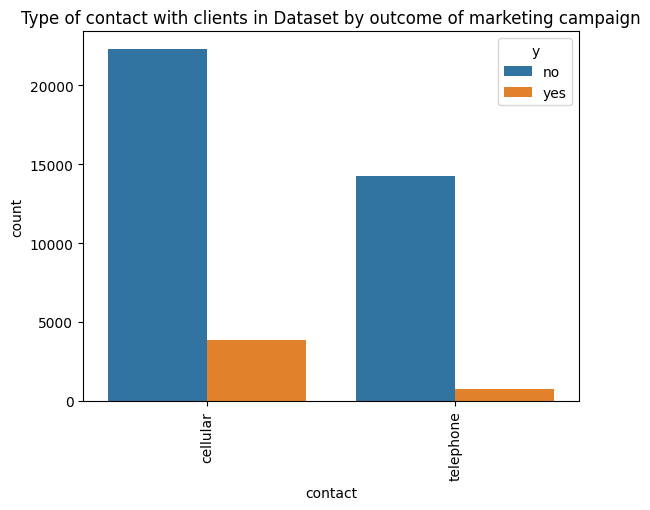

In [74]:
sns.countplot(data = bankdata, x = 'contact',order = bankdata['contact'].value_counts().index, \
              hue = 'y').set(title = 'Type of contact with clients in Dataset by outcome of marketing campaign')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Success of the marketing campaign, by type of contact')

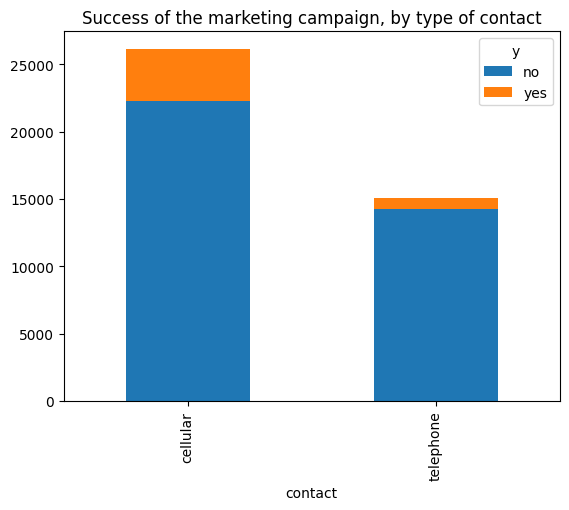

In [75]:
ctCT = pd.crosstab(bankdata.contact, bankdata.y).sort_values('yes', ascending = False)
ctCT.plot(kind = 'bar', stacked = True)
plt.title('Success of the marketing campaign, by type of contact')

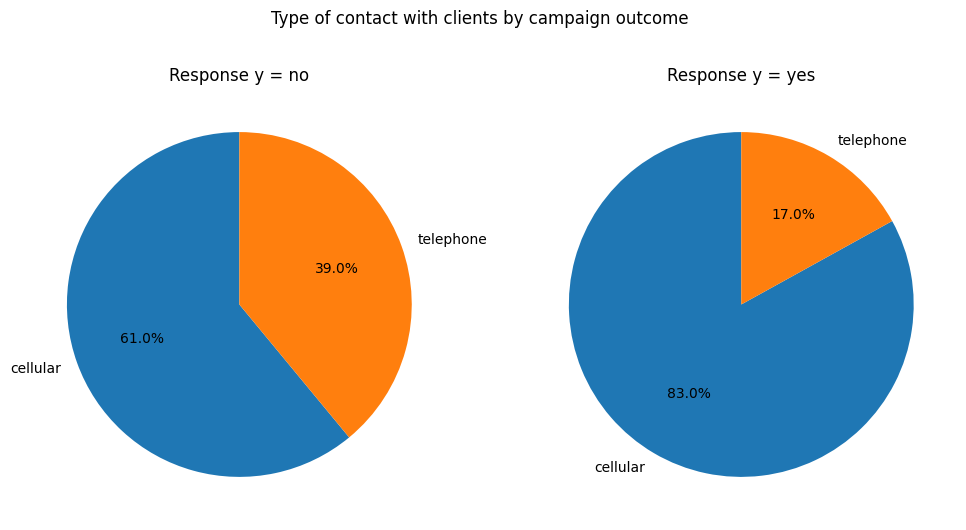

In [76]:
# Group data by 'contact' and 'y' and get the counts
contact_counts = bankdata.groupby(['contact', 'y'])['contact'].count().unstack()

# Create pie charts for each outcome ('yes' and 'no')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for 'no' outcome
axes[0].pie(contact_counts.loc[:, 'no'], labels=contact_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Response y = no')

# Pie chart for 'yes' outcome
axes[1].pie(contact_counts.loc[:, 'yes'], labels=contact_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Response y = yes')

plt.suptitle('Type of contact with clients by campaign outcome', y = 1.05)
plt.tight_layout()
plt.show()

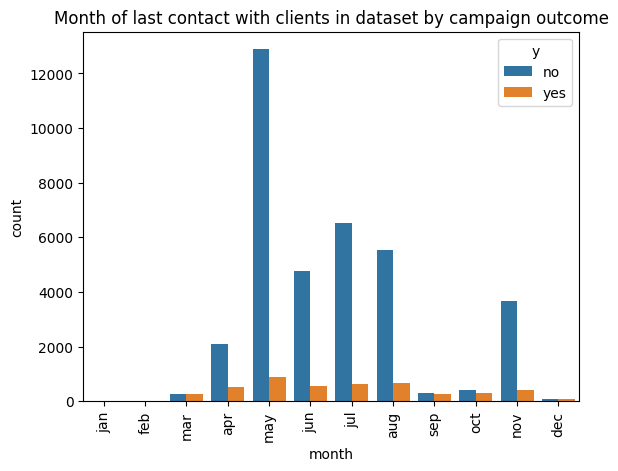

In [77]:
#Month of
order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data = bankdata, x = 'month',  order = order, \
              hue = 'y').set(title = 'Month of last contact with clients in dataset by campaign outcome')
plt.xticks(rotation = 90)
plt.show()

In [78]:
print(pd.crosstab(bankdata['month'], bankdata['y'], margins = True).sort_values('yes', ascending = False))

y         no   yes    All
month                    
All    36548  4640  41188
may    12883   886  13769
aug     5523   655   6178
jul     6525   649   7174
jun     4759   559   5318
apr     2093   539   2632
nov     3685   416   4101
oct      403   315    718
mar      270   276    546
sep      314   256    570
dec       93    89    182


In [79]:
print(pd.crosstab(bankdata['month'], bankdata['y'], normalize = 'index').sort_values('yes', ascending = False))

y            no       yes
month                    
mar    0.494505  0.505495
dec    0.510989  0.489011
sep    0.550877  0.449123
oct    0.561281  0.438719
apr    0.795213  0.204787
aug    0.893979  0.106021
jun    0.894885  0.105115
nov    0.898561  0.101439
jul    0.909534  0.090466
may    0.935653  0.064347


In absolute terms, the highest number of successful sign-ups to the long-term deposit instrument took place in the 'summer months' (May, followed by August, July and June); however, the relative success of the campaign seems to have taken place in the months of March (with 50.55\%), followed by the coller months of December, September and October. It just so happened that the largest number of clients in the set (by far) was contacted last in the month of May.

(Notice that there are no clients in the dataset who were last contacted in January or February; presumably the campaign did not include those months.)

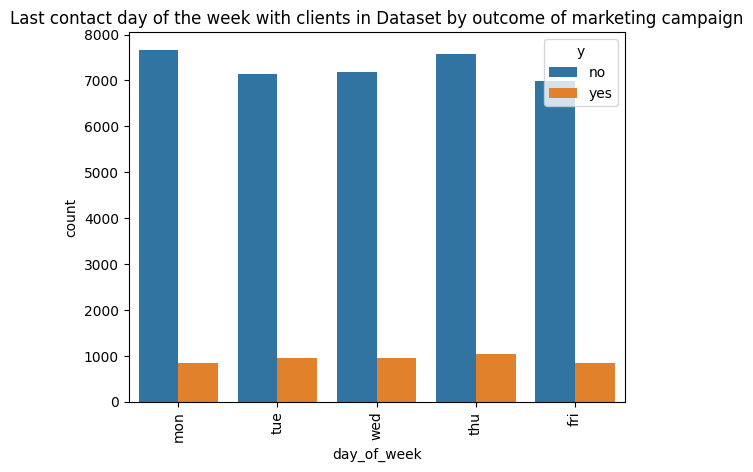

In [80]:
#day of the week

daysorder = ['mon', 'tue', 'wed', 'thu', 'fri']
sns.countplot(data = bankdata, x = 'day_of_week', order = daysorder, \
              hue = 'y').set(title = 'Last contact day of the week with clients in Dataset by outcome of marketing campaign')
plt.xticks(rotation = 90)
plt.show()

In [81]:
print('Breakdown by day of the week (absolute counts):')
print(pd.crosstab(bankdata['day_of_week'], bankdata['y'], margins = True).sort_values('yes', ascending = False))
print('\n')
print('Relative breakdown by day of the week:')
print(pd.crosstab(bankdata['day_of_week'], bankdata['y'], normalize = 'index').sort_values('yes', ascending = False))

Breakdown by day of the week (absolute counts):
y               no   yes    All
day_of_week                    
All          36548  4640  41188
thu           7578  1045   8623
tue           7137   953   8090
wed           7185   949   8134
mon           7667   847   8514
fri           6981   846   7827


Relative breakdown by day of the week:
y                  no       yes
day_of_week                    
thu          0.878812  0.121188
tue          0.882200  0.117800
wed          0.883329  0.116671
fri          0.891913  0.108087
mon          0.900517  0.099483


The distribution of contacts is pretty even throughout the days of the week; notably, the conversion rate is also pretty uniform, though Mondays seem to show a slight lag with respect to the rest of the weekdays.

Thus, it is possible that  that the feature 'day_of_week' may not be very informative in terms of its effect on the success of the campaign.

In [82]:
#Drop day_of_week

bankdata.drop('day_of_week', axis = 1, inplace = True)


In [83]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job              41188 non-null  object 
 1   marital          41188 non-null  object 
 2   education        41188 non-null  object 
 3   default          41188 non-null  object 
 4   housing          41188 non-null  object 
 5   loan             41188 non-null  object 
 6   contact          41188 non-null  object 
 7   month            41188 non-null  object 
 8   previous         41188 non-null  int64  
 9   poutcome         41188 non-null  object 
 10  cons.price.idx   41188 non-null  float64
 11  cons.conf.idx    41188 non-null  float64
 12  euribor3m        41188 non-null  float64
 13  y                41188 non-null  object 
 14  lnage            41188 non-null  float64
 15  campaignunder10  41188 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 5.0+ MB


###Sucess of previous campaigns ('poutcome')
Reminder: we recoded a number of the values in this variable from 'failure' to 'nonexistent' for rows in the dataset such that the original feature 'pdays' was coded as 999, which meant that the client had not been contacted during a previous campaign.

In [84]:
print(pd.crosstab(bankdata['poutcome'], bankdata['y']).sort_values('yes', ascending = False))

y               no   yes
poutcome                
nonexistent  36000  3673
success        479   894
failure         69    73


In [85]:
CTpoutcome = pd.crosstab(bankdata['poutcome'], bankdata['y'], normalize = 'index').sort_values('yes', ascending = False)
print(CTpoutcome)

y                  no       yes
poutcome                       
success      0.348871  0.651129
failure      0.485915  0.514085
nonexistent  0.907418  0.092582


Due to the uneven distribution in the history of the clients in the current campaign of the set, there is another reversal in the analysis here: the largest number of conversions (clients who end up signing up for the long-term deposit instrument) comes from those who did not participate in previous campaigns (poutcome = 'nonexistent'); however, this group represents the lowest relative rate of success of the campaign, simply because the number or clients in this category is so overwhelming. In relative terms, the group of clients for whom a previous campaign was successful has a higher rate of conversion in the current one.

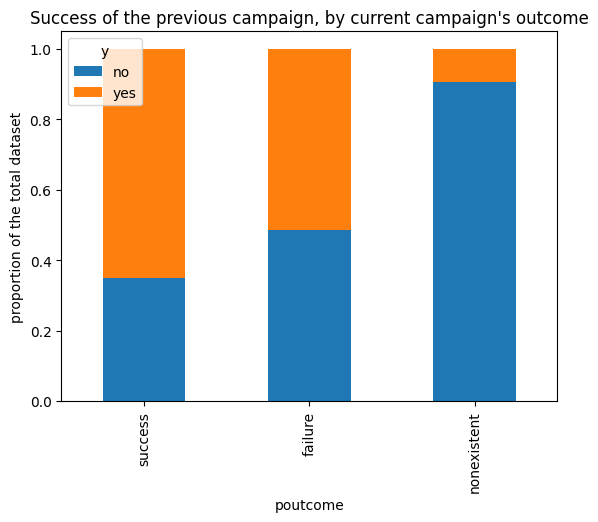

In [86]:
CTpoutcome.plot(kind = 'bar', stacked = True)
plt.title('Success of the previous campaign, by current campaign\'s outcome')
plt.xlabel('poutcome')
plt.ylabel('proportion of the total dataset')
plt.show()

## Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [87]:
#The dataset has been reduced a little (eliminated 'duration', 'pdays', 'day_of_week')
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job              41188 non-null  object 
 1   marital          41188 non-null  object 
 2   education        41188 non-null  object 
 3   default          41188 non-null  object 
 4   housing          41188 non-null  object 
 5   loan             41188 non-null  object 
 6   contact          41188 non-null  object 
 7   month            41188 non-null  object 
 8   previous         41188 non-null  int64  
 9   poutcome         41188 non-null  object 
 10  cons.price.idx   41188 non-null  float64
 11  cons.conf.idx    41188 non-null  float64
 12  euribor3m        41188 non-null  float64
 13  y                41188 non-null  object 
 14  lnage            41188 non-null  float64
 15  campaignunder10  41188 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 5.0+ MB


The objective of the analysis is to build a set of different classifiers to predict the outcome of the marketing campaign (success, coded originally as y='yes', if the client signed up for the long-term deposit instrument,or failure, coded as y=0, if they didn't), based on the information contained in the personal and campaign- related attributes collected in the dataset, as well as socio-economic indicators associated with the current campaign. Once the classifiers are built, the goal is to compare them and make a determination as to which one performs best and make sense of the result.

## Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Encoding of the categorical features can be done before splitting the set into training and testing subsets, as this consists simply of a mapping of the original labels into a numerical value, independently for each sample in the dataset. However, any standardization of the quantitative features in the dataset needs to be carried out after the split in order to avoid "leakage" or influencing the transformation by the whole set (so the testing data if transformed before the split will have been affected by the training data).

In [88]:
#The response variable y is categorical (yes/no) -- Use LabelEncoder to codify it as numerical
y = bankdata['y']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
bankdata['y'] = y #encoded (numerical) values now in response feature 'y'

In [89]:
#Quick check (y should be numerical)
bankdata.head()

,job,marital,education,default,housing,loan,contact,month,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y,lnage,campaignunder10
0,housemaid,married,basic.4y,no,no,no,telephone,may,0,nonexistent,93.994,-36.4,4.857,0,4.025352,1
1,services,married,high.school,unknown,no,no,telephone,may,0,nonexistent,93.994,-36.4,4.857,0,4.043051,1
2,services,married,high.school,no,yes,no,telephone,may,0,nonexistent,93.994,-36.4,4.857,0,3.610918,1
3,admin.,married,basic.6y,no,no,no,telephone,may,0,nonexistent,93.994,-36.4,4.857,0,3.688879,1
4,services,married,high.school,no,no,yes,telephone,may,0,nonexistent,93.994,-36.4,4.857,0,4.025352,1


In [90]:
# Define features X and target y
y = bankdata['y']
X = bankdata.drop('y', axis = 1)

In [91]:
y.shape, X.shape

((41188,), (41188, 15))

In [92]:
#None of the categorical features are ordinal in nature, so OneHotEncoder is appropriate for all of them
#OneHotEncoding of the categorical features in the set

categorical_columns = X.select_dtypes(include = ['object']).columns.tolist()
numerical_columns = X.select_dtypes(exclude = ['object']).columns.tolist()

####Creating pipeline for preprocessing both categorical and quantitative features

In [93]:
#Define feature preprocessors for use after train/test split
#will not drop the first label in OneHot so all labels are visible
preprocessor = ColumnTransformer(
    transformers = [
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder( sparse_output = False, handle_unknown = 'error'), categorical_columns)
    ]
)


All the features will be coded as numerical and thus can be used by the different classification models.

## Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [94]:
# Split the features of the dataset into training and test sets

#Use 80% of data to train the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #fix random_state for reproducibility

In [95]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32950, 15), (32950,), (8238, 15), (8238,))

In [96]:
#Now we can process the training and testing sets separately through the numerical and categorical preprocessors
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [97]:
X_train.shape, X_test.shape

((32950, 54), (8238, 54))

In [98]:
onehot_encoder = preprocessor.named_transformers_['cat']
print(onehot_encoder.get_feature_names_out(categorical_columns))

['job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'marital_unknown'
 'education_basic.4y' 'education_basic.6y' 'education_basic.9y'
 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'default_no' 'default_unknown' 'default_yes'
 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no' 'loan_unknown'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'poutcome_failure' 'poutcome_nonexistent'
 'poutcome_success']


## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

There are a couple of options to use as baseline model for a classifier: a random classifier, which assigns predictions based on the observed breakdown in the response variable in the dataset, and what is known as a ZeroR classifier, which does not produce random predictions, but instead makes every prediction match the majority class observed in the response variable in the dataset. These are both variations of a so-called Dummy Classifier. In addition to these two general rules, a baseline (dummy) classifier can also assign class labels randomly and uniformly regardless of the distribution of classes in the training data; or, finally, the classifier can predict always a constant class label specified by a constant parameter.



In [99]:
#initialize results matrix
results_simplemodels = []

Time taken (seconds):  0.0022220611572265625
Accuracy for Baseline Classifier (majority class):  0.8865015780529255

Classification Report for Baseline Dummy Classifier: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

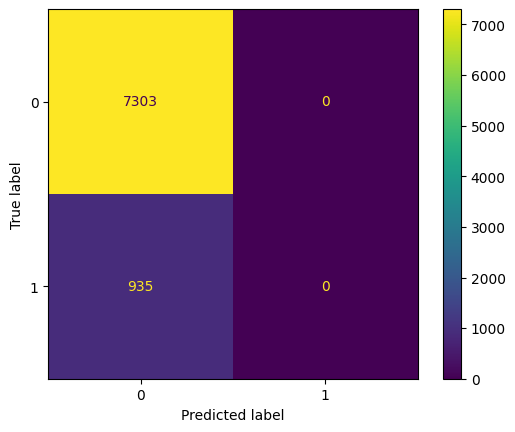

In [100]:
#Create a baseline dummy classifier
#Data has already been split into X_train, X_test, y_train, y_test,
# and the X features have been transformed (OneHot for categorical, MinMax for numerical)

dummy_classifier = DummyClassifier(strategy = 'most_frequent')
#other options are 'stratified'/'prior'/'stratified'/'uniform'/'constant'

#Start timer
start_time = time.time()

#Fit this baseline classifier on the training data
dummy_classifier.fit(X_train, y_train)

#Compute predictions on the test data
y_pred = dummy_classifier.predict(X_test)

end_time = time.time()

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = 1)
recall = recall_score(y_test, y_pred, pos_label = 1)
f1 = f1_score(y_test, y_pred, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred, labels = dummy_classifier.classes_)
report = classification_report(y_test, y_pred)

#Append line of results
results_simplemodels.append(["Dummy Classifier", accuracy, precision, recall, f1, end_time-start_time])

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = dummy_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for Baseline Classifier (majority class): ", accuracy)
print("\nClassification Report for Baseline Dummy Classifier: ")
print(report)
disp.plot()
plt.show()

## Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Time taken (seconds):  0.12937068939208984
Accuracy for Logistic Regression:  0.8953629521728574
Intercept:  [-0.48103294] ; coefficients:  [[-1.70612858  1.3042654   1.09073298 -2.38249737 -0.16046025  0.80923295
  -0.0030139  -0.14211086 -0.07491805 -0.12955132 -0.05092532  0.26451753
  -0.14107252 -0.14174329  0.19576939  0.03182867  0.01203374 -0.25059011
  -0.18342456 -0.14281975 -0.13640592  0.03287419 -0.10611083 -0.0190074
  -0.13385654 -0.11654967  0.15791692 -0.12880323 -0.00617836 -0.07718693
  -0.07314771 -0.33093142 -0.02569692 -0.13538561 -0.12895053 -0.16543991
  -0.14735    -0.12895053 -0.15347552  0.0523005  -0.48207655 -0.13620673
  -0.25058944  0.10437037  0.06130122  0.01931304  0.92239486 -0.7983669
  -0.25143701  0.12277709 -0.22333254  0.11248903 -1.17011892  0.62785385]]

Classification Report for basic Logistic Regression Classifier: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       

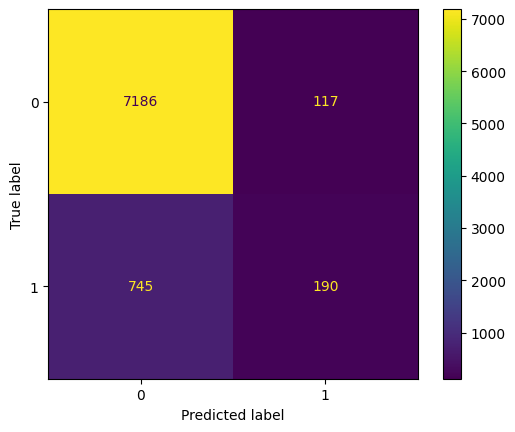

In [101]:
lr_classifier = LogisticRegression()

start_time = time.time()

lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
end_time = time.time()

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, pos_label = 1)
recall = recall_score(y_test, y_pred_lr, pos_label = 1)
f1 = f1_score(y_test, y_pred_lr, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_lr, labels = lr_classifier.classes_)
report = classification_report(y_test, y_pred_lr)

#Append line of results
results_simplemodels.append(["Logistic Regression", accuracy, precision, recall, f1, end_time-start_time])



disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = lr_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for Logistic Regression: ", accuracy)
print("Intercept: ", lr_classifier.intercept_, "; coefficients: ", lr_classifier.coef_)
print("\nClassification Report for basic Logistic Regression Classifier: ")
print(report)
disp.plot()
plt.show()

## Problem 9: Score the Model

What is the accuracy of your model?

Time taken (seconds):  0.12937068939208984
Accuracy for Baseline Classifier (majority class):  0.8953629521728574

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.62      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238



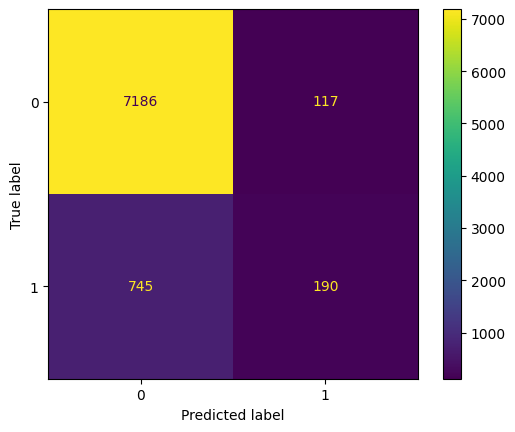

In [102]:
#This was calculated in the previous cell


disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = lr_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for Baseline Classifier (majority class): ", accuracy)
print("\nClassification Report: ")
print(report)
disp.plot()
plt.show()

## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

KNN

Time taken (seconds):  2.047461748123169
Accuracy for KNN (k = 5):  0.8854090798737557

Classification Report for KNN Classifier (k = 7): 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.49      0.23      0.31       935

    accuracy                           0.89      8238
   macro avg       0.70      0.60      0.63      8238
weighted avg       0.86      0.89      0.87      8238



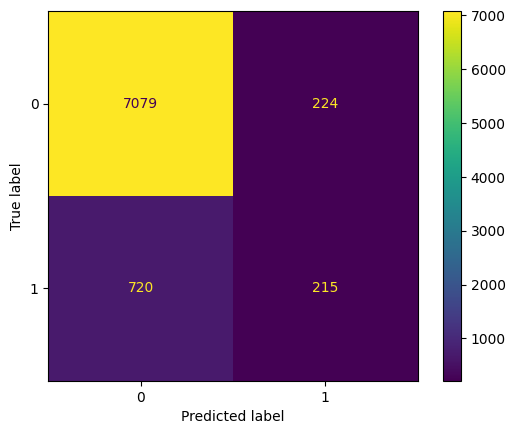

In [103]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5) #values around 3, 5 or 7 tend to work well (depends on data, of course)
#Will determine optimal k value when doing GridSearchCV

start_time = time.time()

knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
end_time = time.time()

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, pos_label = 1)
recall = recall_score(y_test, y_pred_knn, pos_label = 1)
f1 = f1_score(y_test, y_pred_knn, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_knn, labels = knn_classifier.classes_)
report = classification_report(y_test, y_pred_knn)

#Append line of results
results_simplemodels.append(["KNN", accuracy, precision, recall, f1, end_time-start_time])



disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = knn_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for KNN (k = 5): ", accuracy)
print("\nClassification Report for KNN Classifier (k = 7): ")
print(report)
disp.plot()
plt.show()


Decision Tree

Time taken (seconds):  0.06563806533813477
Accuracy for Decision Tree:  0.8974265598446225

Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.68      0.18      0.29       935

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



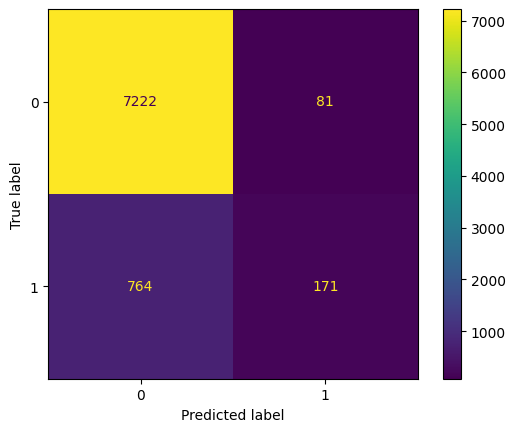

In [104]:
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 42)
start_time = time.time()

dtree = tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)

end_time = time.time()


#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree, pos_label = 1)
recall = recall_score(y_test, y_pred_tree, pos_label = 1)
f1 = f1_score(y_test, y_pred_tree, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_tree, labels = tree_classifier.classes_)
report = classification_report(y_test, y_pred_tree)

#Append line of results
results_simplemodels.append(["Decision Tree", accuracy, precision, recall, f1, end_time-start_time])



disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = tree_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for Decision Tree: ", accuracy)
print("\nClassification Report for Decision Tree: ")
print(report)
disp.plot()
plt.show()


[Text(0.5, 0.875, 'x[3] <= 0.137\nentropy = 0.507\nsamples = 32950\nvalue = [29245, 3705]'),
 Text(0.25, 0.625, 'x[52] <= 0.5\nentropy = 0.995\nsamples = 3450\nvalue = [1874, 1576]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 0.035\nentropy = 0.867\nsamples = 936\nvalue = [270, 666]'),
 Text(0.0625, 0.125, 'entropy = 0.988\nsamples = 110\nvalue = [48.0, 62.0]'),
 Text(0.1875, 0.125, 'entropy = 0.84\nsamples = 826\nvalue = [222.0, 604.0]'),
 Text(0.375, 0.375, 'x[39] <= 0.5\nentropy = 0.944\nsamples = 2514\nvalue = [1604, 910]'),
 Text(0.3125, 0.125, 'entropy = 0.745\nsamples = 444\nvalue = [350, 94]'),
 Text(0.4375, 0.125, 'entropy = 0.967\nsamples = 2070\nvalue = [1254, 816]'),
 Text(0.75, 0.625, 'x[3] <= 0.574\nentropy = 0.374\nsamples = 29500\nvalue = [27371, 2129]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[47] <= 0.5\nentropy = 0.599\nsamples = 7332\nvalue = [6265, 1067]'),
 Text(0.5625, 0.125, 'entropy = 0.8\nsamples = 2716\nvalue = [2056, 660]'),
 T

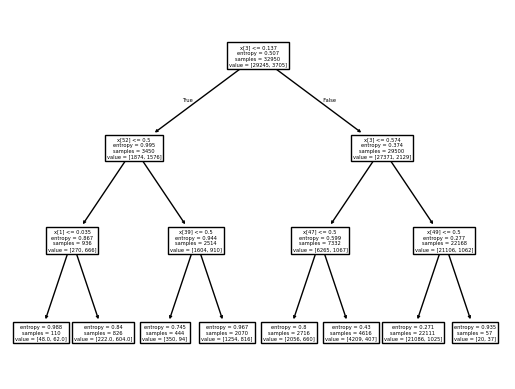

In [105]:
#DT diagram
tree.plot_tree(dtree)

Support Vector Machine (SVC)

Time taken (seconds):  13.244346380233765
Accuracy for SVC:  0.8947560087399854

Classification Report for SVC: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



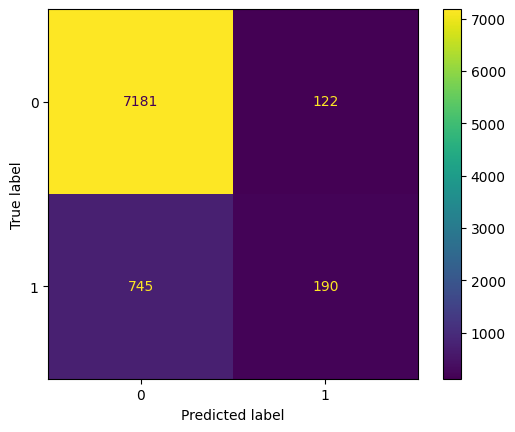

In [106]:
SVC_classifier = SVC(kernel = 'linear') #will explore type of kernel when doing GridSearchCV
start_time = time.time()

SVC_classifier.fit(X_train, y_train)
y_pred_SVC = SVC_classifier.predict(X_test)

end_time = time.time()

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_SVC)
precision = precision_score(y_test, y_pred_SVC, pos_label = 1)
recall = recall_score(y_test, y_pred_SVC, pos_label = 1)
f1 = f1_score(y_test, y_pred_SVC, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_SVC, labels = SVC_classifier.classes_)
report = classification_report(y_test, y_pred_SVC)

#Append line of results
results_simplemodels.append(["SVC", accuracy, precision, recall, f1, end_time-start_time])



disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = SVC_classifier.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for SVC: ", accuracy)
print("\nClassification Report for SVC: ")
print(report)
disp.plot()
plt.show()


In [107]:
#Finalize results_simplemodels Fataframe
results_simplemodels_df = pd.DataFrame(results_simplemodels, columns = ['Model', 'Train Accuracy',  'Precision', 'Recall', \
                                                                        'F1 Score', 'Train Time'])
results_simplemodels_df

,Model,Train Accuracy,Precision,Recall,F1 Score,Train Time
0,Dummy Classifier,0.886502,0.000000,0.000000,0.000000,0.002222
1,Logistic Regression,0.895363,0.618893,0.203209,0.305958,0.129371
2,KNN,0.885409,0.489749,0.229947,0.312955,2.047462
3,Decision Tree,0.897427,0.678571,0.182888,0.288121,0.065638
4,SVC,0.894756,0.608974,0.203209,0.304731,13.244346


## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Note** (in response to the first prompt above): the dataset for this application does not include a gender feature.

In [121]:
#Initialize improved models results
results_improvedmodels = []

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Optimal hyperparameter:  {'C': 1, 'penalty': 'l2'}
Best score:  0.9000303490136572
Time taken (seconds):  3.33308482170105
Accuracy for  GridSearch Logistic Regression:  0.8953629521728574

Classification Report for GridSearch Logistic Regression: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.62      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238



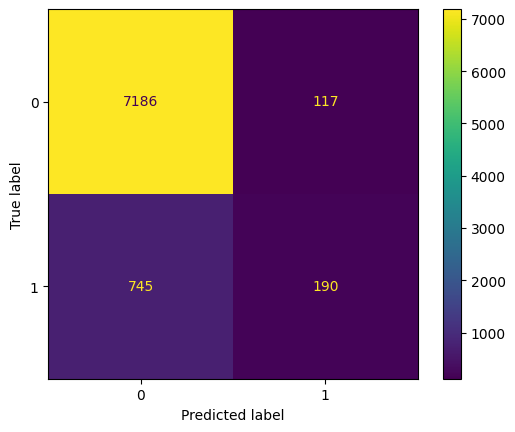

In [122]:
#Refine Logistic Regression
parameters = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}


start_time = time.time()

gridsearch_lr = GridSearchCV(LogisticRegression(), parameters, cv = 5, return_train_score = True, n_jobs = -1, verbose = 0)
gridsearch_lr.fit(X_train, y_train)

end_time = time.time()

print('Optimal hyperparameter: ', gridsearch_lr.best_params_)
print('Best score: ', gridsearch_lr.best_score_)

#metrics
y_pred_gslr = gridsearch_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gslr)
precision = precision_score(y_test, y_pred_gslr, pos_label = 1)
recall  = recall_score(y_test, y_pred_gslr, pos_label = 1)
f1 = f1_score(y_test, y_pred_gslr, pos_label = 1)

conf_matrix = confusion_matrix(y_test, y_pred_gslr, labels = gridsearch_lr.classes_)
report = classification_report(y_test, y_pred_gslr)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = gridsearch_lr.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for  GridSearch Logistic Regression: ", accuracy)
print("\nClassification Report for GridSearch Logistic Regression: ")
print(report)
disp.plot()
plt.show()

#Append line of results
results_improvedmodels.append(["GS LogReg", accuracy, precision, recall, f1, end_time-start_time])


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Optimal hyperparameter:  {'n_neighbors': 13}
Best score:  0.8965402124430956
Time taken (seconds):  129.7557258605957
Accuracy for  GridSearch KNN:  0.8936635105608157

Classification Report for GridSearch KNN: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.60      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.75      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



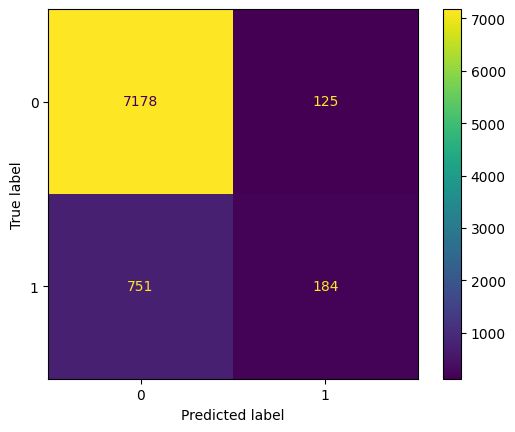

In [123]:
#Refine KNN
parameters = {'n_neighbors': np.arange(4,20,3)}

start_time = time.time()

gridsearch_knn = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5, return_train_score = True, n_jobs = -1, verbose = 1)
gridsearch_knn.fit(X_train, y_train)

end_time = time.time()

print('Optimal hyperparameter: ', gridsearch_knn.best_params_)
print('Best score: ', gridsearch_knn.best_score_)

#metrics
y_pred_gsknn = gridsearch_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gsknn)
precision = precision_score(y_test, y_pred_gsknn, pos_label = 1)
recall  = recall_score(y_test, y_pred_gsknn, pos_label = 1)
f1 = f1_score(y_test, y_pred_gsknn, pos_label = 1)
conf_matrix = confusion_matrix(y_test, y_pred_gsknn, labels = gridsearch_knn.classes_)
report = classification_report(y_test, y_pred_gsknn)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = gridsearch_knn.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for  GridSearch KNN: ", accuracy)
print("\nClassification Report for GridSearch KNN: ")
print(report)
disp.plot()
plt.show()

#Append line of results
results_improvedmodels.append(["GS KNN", accuracy, precision, recall, f1, end_time-start_time])

Optimal hyperparameter:  {'criterion': 'entropy', 'max_depth': 6}
Best score:  0.9007890743550835
Time taken (seconds):  3.1213815212249756
Accuracy for  GridSearch Decision Tree:  0.8975479485311969

Classification Report for GridSearch Decision Tree: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.62      0.25      0.36       935

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



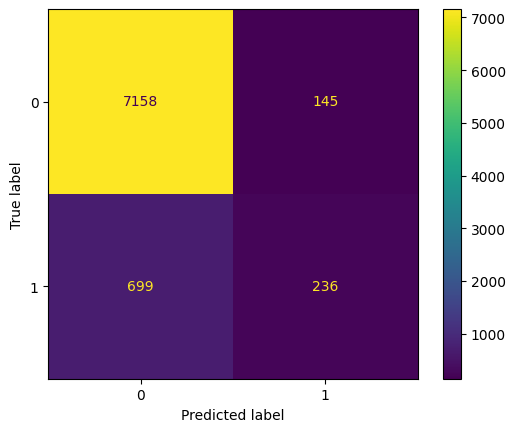

In [124]:
#Refine Decision Tree

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              }

start_time = time.time()

gridsearch_dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, return_train_score = True, n_jobs = -1, verbose = 0)
gridsearch_dt.fit(X_train, y_train)

end_time = time.time()

print('Optimal hyperparameter: ', gridsearch_dt.best_params_)
print('Best score: ', gridsearch_dt.best_score_)

#metrics
y_pred_gsdt = gridsearch_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gsdt)
precision = precision_score(y_test, y_pred_gsdt, pos_label = 1)
recall  = recall_score(y_test, y_pred_gsdt, pos_label = 1)
f1 = f1_score(y_test, y_pred_gsdt, pos_label = 1)

conf_matrix = confusion_matrix(y_test, y_pred_gsdt, labels = gridsearch_dt.classes_)
report = classification_report(y_test, y_pred_gsdt)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = gridsearch_dt.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for  GridSearch Decision Tree: ", accuracy)
print("\nClassification Report for GridSearch Decision Tree: ")
print(report)
disp.plot()
plt.show()

#Append line of results
results_improvedmodels.append(["GS DecTree", accuracy, precision, recall, f1, end_time-start_time])



Fitting 3 folds for each of 6 candidates, totalling 18 fits
Optimal hyperparameter:  {'C': 1, 'kernel': 'rbf'}
Best score:  0.8985432738675767
Time taken (seconds):  384.7360897064209
Accuracy for  GridSearch SVC:  0.8963340616654528

Classification Report for GridSearch SVC: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7303
           1       0.64      0.19      0.30       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



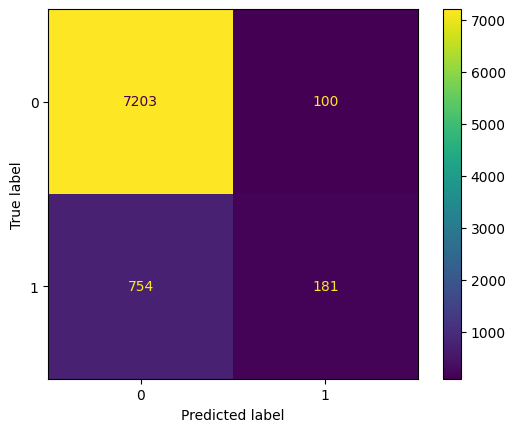

In [125]:
#Refine SVM

parameters = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

start_time = time.time()

gridsearch_svc = GridSearchCV(SVC(), parameters, cv = 3, return_train_score = True, n_jobs = -1, verbose = 2)
gridsearch_svc.fit(X_train, y_train)

end_time = time.time()

print('Optimal hyperparameter: ', gridsearch_svc.best_params_)
print('Best score: ', gridsearch_svc.best_score_)

#metrics
y_pred_gssvc = gridsearch_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gssvc)
precision = precision_score(y_test, y_pred_gssvc, pos_label = 1)
recall  = recall_score(y_test, y_pred_gssvc, pos_label = 1)
f1 = f1_score(y_test, y_pred_gssvc, pos_label = 1)

conf_matrix = confusion_matrix(y_test, y_pred_gssvc, labels = gridsearch_svc.classes_)
report = classification_report(y_test, y_pred_gssvc)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = gridsearch_svc.classes_)
#Printout of results
print("Time taken (seconds): ", end_time - start_time)
print("Accuracy for  GridSearch SVC: ", accuracy)
print("\nClassification Report for GridSearch SVC: ")
print(report)
disp.plot()
plt.show()

#Append line of results
results_improvedmodels.append(["GS SVC", accuracy, precision, recall, f1, end_time-start_time])


In [126]:
#Finalize results_simplemodels Fataframe
results_improvedmodels_df = pd.DataFrame(results_improvedmodels, columns = ['Model', 'Train Accuracy',  'Precision', 'Recall', \
                                                                        'F1 Score', 'Train Time'])
results_improvedmodels_df

,Model,Train Accuracy,Precision,Recall,F1 Score,Train Time
0,GS LogReg,0.895363,0.618893,0.203209,0.305958,3.333085
1,GS KNN,0.893664,0.595469,0.196791,0.295820,129.755726
2,GS DecTree,0.897548,0.619423,0.252406,0.358663,3.121382
3,GS SVC,0.896334,0.644128,0.193583,0.297697,384.736090


##Analysis

In the initial stages of this project it was pointed out that since the dataset has a severe imbalance in the response classes, accuracy is not the right metric to compare models. Indeed, by accuracy measures, it would be hard to outperform the simplest of dummy classifiers, always predicting the majority class. In practice, although it seems that the simple logistic regression classifier, a simple decision tree and a support vector machine model all achieve higher accuracy than the dummy, they come at the cost of increased training time (as there is no training required in the dummy classifier).


Thus, it is now important to decide which alternative metric to focus on, based on the confusion matrix produced by each classifier.


Some definitions (based on the confusion matrix produced by a classifier):

|      | Predicted label 0      | Predicted label 1 |
| ------------- | ------------- |---|
|True label 0 | true negative (TN)|false positive (FP) |
| True label 1 | false negative (FN) |true positive (TP) |

<u>Classifier Errors</u>:

* FP = false positive: the model predicts that a client will sign up for the long-term deposit when they actually won't $\rightarrow$ perhaps resources are wasted in contacting the client, trying to coax them into signing, a fruitless endeavor.

* FN = false negative: the model predicts that a client will not sign up for the instrument when in fact they will $\rightarrow$ lost business.

<u> Metric Candidates</u>:

* **Precision** = $\frac{TP}{TP + FP}$ = proportion of all the 'yes' predictions that are actually correct.


* **Recall** = $\frac{TP}{TP + FN}$ = proportion of all the actual 'yes' labels that the model was able to classify correctly.

* **f1score**  = harmonic mean of precision and recall (a combined metric)

In this bank classification problem, it would seem that focusing on capitalizing on all the potential conversions (minimizing the false negatives) would be a higher priority than minimizing the false positives. After all, the bank's agents and overall promotional material for the campaign could be seen as a relatively constant resource (the bank will likely maintain a stable agent force to work throughout the campaign).


Hence, this analysis focuses on finding the classifier that maximizes recall, with the additional understanding that both precision and accuracy are also important performance metrics of any classification model.



Making use of the two dataframes resulting from running the code containing the results for the simple models and for the improved models, the results are:


|Criterion      |Simple Model Winner      |Improved Model Winner | Notes |
| ------------- | ------------- |---| ---|
|Simplicity| Dummy classifier|NA | baseline model, no training required|
| ------------------ | -------------------------------------- |------------------------------------| ---------------------------------------------------------|
|Accuracy |Decision Tree |Decision Tree | |
| | accuracy = 0.8974 | accuracy = 0.8975 | not the right metric due to |
| | training time: 0.0938s | training time: 3.12s |imbalance in outcome |
| ------------------ | -------------------------------------- |------------------------------------| ---------------------------------------------------------|
|Precision |Decision Tree |SVC | |
| | precision = 0.6786 | precision = 0.6441 | in this application not  |
| | training time: 0.0938s | training time: 384.74s |looking at optimizing this metric |
| ------------------ | -------------------------------------- |------------------------------------| ---------------------------------------------------------|
|Recall |KNN |Decision Tree | |
| | recall = 0.2299 | recall = 0.2524 | this is the metric to |
| | training time: 3.14s | training time: 3.12s |focus on |
| ------------------ | -------------------------------------- |------------------------------------| ---------------------------------------------------------|
|f1 score |KNN |Decision Tree | |
| | f1 = 0.3130 | f1 = 0.3587 | this is a combined metric |
| | training time: 3.14s | training time: 3.12s |showing DT as winner as well |

Clearly the best classification model for this application is the optimized decision tree (with hyperparameters criterion = entropy and max_depth = 6), with the added advantage that it is also extremely efficient with a training time of 3.12 seconds.

Although the resulting recall may not be particularly impressive at 25.24%, the optimized decision tree classifier also produces the second highest precision at 61.94%, and even an accuracy that exceeds that of the basic, majority-based dummy classifier at 89.75% (compared to 88.65% for the dummy classifier). In fact, this optimal decision tree also maximizes the f1 score, the harmonic mean of precision and recall.


###Visualizing the winning model
 Decision Tree classifier with hyperparameters {criterion = entropy, max_depth = 6}

[Text(0.49369266055045874, 0.9285714285714286, 'x[3] <= 0.137\nentropy = 0.507\nsamples = 32950\nvalue = [29245, 3705]'),
 Text(0.22362385321100917, 0.7857142857142857, 'x[52] <= 0.5\nentropy = 0.995\nsamples = 3450\nvalue = [1874, 1576]'),
 Text(0.35865825688073394, 0.8571428571428572, 'True  '),
 Text(0.0871559633027523, 0.6428571428571429, 'x[1] <= 0.035\nentropy = 0.867\nsamples = 936\nvalue = [270, 666]'),
 Text(0.027522935779816515, 0.5, 'x[4] <= 0.134\nentropy = 0.988\nsamples = 110\nvalue = [48.0, 62.0]'),
 Text(0.01834862385321101, 0.35714285714285715, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.03669724770642202, 0.35714285714285715, 'x[3] <= 0.054\nentropy = 0.976\nsamples = 105\nvalue = [43, 62]'),
 Text(0.01834862385321101, 0.21428571428571427, 'x[3] <= 0.048\nentropy = 0.863\nsamples = 42\nvalue = [12, 30]'),
 Text(0.009174311926605505, 0.07142857142857142, 'entropy = 0.998\nsamples = 17\nvalue = [8, 9]'),
 Text(0.027522935779816515, 0.07142857142857142, 'entro

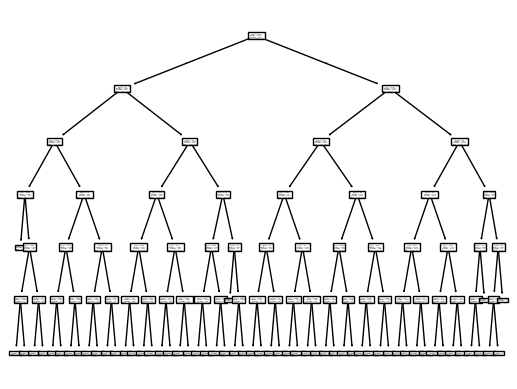

In [118]:
#Optimal Decision Tree
#Reminder: X_train was already run through preprocessor

optimal_dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 6).fit(X_train, y_train)
#basic plot:
tree.plot_tree(optimal_dtree)

###A better visualization of the optimal decision tree

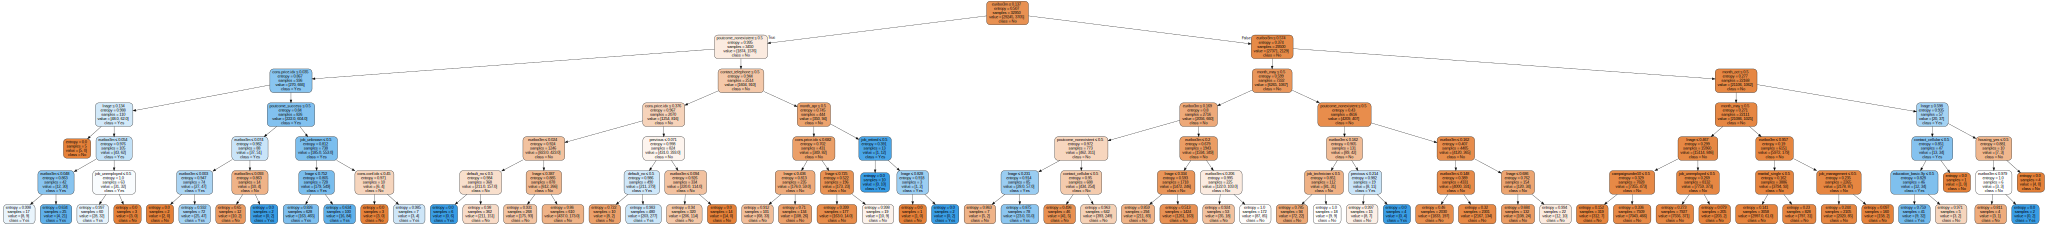

In [120]:
#Additional library for a better diagram
import graphviz


# Get feature names after preprocessing
feature_names = numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

# Now you can export the decision tree with the proper feature names
dot_data = tree.export_graphviz(
    optimal_dtree,
    out_file=None,
    feature_names=feature_names,  # Use the updated feature names
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="/content/drive/My Drive/Berkeley/data/OptimalDecisionTree")
graph

Note: the labels correspond to encoded features (OneHot for categorical features and MinMax for quantitative ones), so detailed interpretation would require reversing such transformations.

###**Features of the optimal classifier:**
A look at the resulting optimized decision tree reveals that the following (encoded) features participate in determining the classifier's ruling:
* Client attributes:
    * ln(age)
    * education_basic.9y
    * job_unknown
    * job_technician
    * job_unemployed
    * job_management
    * job_retired
    * marital_single
* Features related to clients' credit risk:
    * default_no
    * housing_yes
* Features related to the current campaign:
    * campaignunder10
    * contact_cellular
    * contact_telephone
    * month_may
    * month_oct
    * month_apr
* Features related to previous campaign(s):
    * previous
    * poutcome_success
    * poutcome_nonexistent
*Economic features:
    * euribor3m
    * cons.price.idx
    * cons.conf.idx



It is interesting to see that all the socioeconomic features play a role in the classification rule (as a reminder, we dropped the remaining two features, emp.var.rate and nr.employed due to their high correlation with euribor3m). This suggests that the economic atmosphere is a fundamental driver in the success of the campaign promoting this long-term deposit instrument, which is truly not surprising.

##Findings of the Analysis / Actionable Items

With the understanding that the economic atmosphere of the country (Portugal) is critical in terms of individuals' financial/investment decisions, decision-makers can also focus on the following characteristics which appear to be aligned with a higher conversion rate for the long-term deposit instrument involved in the campaign:

Clients' attributes: in truth, **clients of all ages** signed up for the long-term deposit, though the distribution of ages in the successful campaign group is flatter and more highly skewed right, which is consistent with the job category **'job-retired'**. Other job categories that should be kept "in the radar" are **management** and **technician**, though the **"unemployed"** and **"unknown"** categories should not be dismissed and ought to be explored deeper, as they associate with close-to-average conversion rates. Finally, the one education level category that the model indicates should be flagged is **education_basic.9yr, which has the lowest conversion rate** among all the education level categories.


In terms of the actual contacts carried out with clients, there is a clearly higher success rate when these are done via cellphone (**contact_cellular**) versus a landline (contact_telephone). As for the **number of contacts**, if the bank agents have reached **9** contacts with a client without being able to close the conversion, our analysis suggests (and the results of the classifier confirm this) that the likelihood that such a client will sign up for the long-term deposit instrument being offered is very low -this is captured by the artificial feature campaignunder10. Thus, management may wish to set up a rule to decide whether additional resources (agents' time) ought to be invested in pursuing the conversion. Finally, as mentioned earlier, there are variations in the degree of success of the campaign throughout the year, and the classifier has identified as relevant encoded features **month_oct (a month with great success rate), month_apr (middle of the road) and month_may (the month with the lowest success rate)** to form a decision. It is useful to keep in mind that the time of the year is likely closely linked to the country's economic conditions, so some additional care is necessary when issuing generalizations about the results.
Speaking of the socio-economic context features, it seems like the campaign is more successful when **'euribor3m'** is lower (which correlates with points in time when **'nr.employed'** is also lower, and **'emp.var.rate'** takes on negative values), which suggests that clients tend to invest in the long-term deposit during somewhat pessimistic times.  



###Limitations of the Project and Potential Next Steps

Throughout the project we detected some inconsistencies in the data (for instance, clients whose 'pdays' attribute was coded as 999, meaning that they had not participated in the previous campaign, but that then had "failure" in the 'poutcome' feature). Like with any other data-intensive project, it is important to keep in mind that the quality of the input will necessarily affect the quality of the results.

A couple of ideas that appear to be easy to implement and could enrich the analysis include keeping track of the specific agent (or their experience level) associated with each client, and, since the campaign seems to have been run through personal contact (via cellphone or landline), it may even be useful to keep track of how the agent's characteristics match with those of the client -e.g. age, gender, etc.

A final observation is that although it initially appeared as if the features in the set were evenly split between categorical and quantitative, it could be argued that in fact most of the information ended up being categorical: 'duration' was dropped as suggested in the data source; 'campaign' was used only as a threshold to separate the target outcome classes; 'pdays' was partly categorical and was dropped from the modeling; (the exceptions are the clients' ages, the socio-economic context features, and the 'previous' feature). Including additional quantitative features (such as clients' income, how long they have been clients at the institution, family size, loan amounts for those who have them, etc.) may contribute to produce superior classifiers.

